In [1]:
# TODO: inspect that datetime conversion happened correctly (one of each data point, maybe additional checks)

## Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

In [2]:
notebook_dir = os.getcwd()
data_dir = os.path.dirname(os.path.dirname(notebook_dir))
appended_dir = os.path.join(data_dir, 'appended')
data_path = os.path.join(appended_dir, 'incl_noon_reports.csv')

df = pd.read_csv(data_path, parse_dates=['utc_timestamp'])

df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], format='ISO8601')

/tmp/ipykernel_28259/3297968600.py:6: DtypeWarning: Columns (0: value) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, parse_dates=['utc_timestamp'])


In [3]:
qid_mappings_dict = df[['quantity_name', 'qid_mapping', 'source_name']].drop_duplicates()
qid_mappings_dict

quantity_name  \
0      Vessel External Conditions Eastward Sea Water ...   
1      Vessel External Conditions Northward Wind Velo...   
2      Vessel External Conditions Northward Sea Water...   
3             Vessel External Conditions Wind True Speed   
4                 Vessel External Conditions Wave Period   
5      Vessel External Conditions Eastward Sea Water ...   
6             Vessel External Conditions Wave True Angle   
7      Vessel External Conditions Wave Significant He...   
8      Vessel External Conditions Swell Significant H...   
9             Vessel External Conditions Wind True Angle   
10     Vessel External Conditions Eastward Wind Velocity   
11     Vessel External Conditions Wave Significant He...   
12     Vessel External Conditions Northward Sea Water...   
13      Vessel External Conditions Sea Water Temperature   
14        Vessel External Conditions Wind Relative Angle   
15        Vessel External Conditions Wind Relative Speed   
16                         Vessel Hull Over Ground Speed   
17          Vessel Hull Through Water Longitudinal Speed   
18        Vessel Hull Relative To Transducer Water Depth   
19                        Vessel Hull Heading True Angle   
20                         Vessel Hull Heading Turn Rate   
21             Main Engine Turbocharger Rotational Speed   
22                   Main Engine Scavenging Air Pressure   
23                               Main Engine Fuel Load %   
24                                Vessel Hull MidP Draft   
25                                Vessel Hull Fore Draft   
26                                Vessel Hull MidS Draft   
27                                 Vessel Hull Aft Draft   
28                          Main Engine Rotational Speed   
29                         Vessel Propeller Shaft Torque   
30               Vessel Propeller Shaft Mechanical Power   
31                  Main Engine Fuel Oil Inlet Mass Flow   
32              Vessel Propeller Shaft Mechanical Energy   
33                   Vessel Propeller Shaft Thrust Force   
34               Vessel Propeller Shaft Rotational Speed   
35       Vessel Propeller Shaft Revolutions (cumulative)   
63524                                           Sea Temp   
63525                                         Wind Force   
63526                                     Wind Direction   
63527                                      Sea Direction   
63528                                          Sea State   
63529                         Consumption for Propulsion   
63530                                       Bar Pressure   
63531                                           Air Temp   
63532                                       Displacement   
63533                                          Aft Draft   
63534                                          Mid Draft   
63535                                               Fuel   
63536                                          Fwd Draft   
63537                                               Slip   

                                   qid_mapping  \
0       4::0::8::0_1::1::0::7::0_56::0::3::0_8   
1       4::0::8::0_1::1::0::7::0_56::0::6::0_8   
2       4::0::8::0_1::1::0::7::0_56::0::4::0_8   
3       4::0::4::0_1::1::0::7::0_1::0::4::21_8   
4       4::0::8::0_1::1::0::7::0_40::0::2::0_8   
5       4::0::4::0_1::1::0::7::0_56::0::3::0_8   
6      4::0::8::0_1::1::0::7::0_2::0::18::21_8   
7       4::0::8::0_1::1::0::7::0_45::0::1::0_8   
8       4::0::4::0_1::1::0::7::0_45::0::2::0_8   
9      4::0::4::0_1::1::0::7::0_2::0::15::21_8   
10      4::0::8::0_1::1::0::7::0_56::0::5::0_8   
11      4::0::4::0_1::1::0::7::0_45::0::1::0_8   
12      4::0::4::0_1::1::0::7::0_56::0::4::0_8   
13      4::0::8::0_1::1::0::7::0_4::0::12::0_8   
14     2::0::1::0_1::1::0::7::0_2::0::15::22_8   
15      2::0::1::0_1::1::0::7::0_1::0::4::22_8   
16       2::0::6::1_1::1::0::2::0_1::0::1::0_8   
17      2::0::7::0_1::1::0::2::0_1::0::5::11_8   
18      2::0::4::0_1::1::0::2::0

In [4]:
df.shape

(41085092, 6)

In [5]:
df.head()

utc_timestamp                             qid_mapping   value  \
0 2024-01-01 00:00:00+00:00  4::0::8::0_1::1::0::7::0_56::0::3::0_8    -0.4   
1 2024-01-01 00:00:00+00:00  4::0::8::0_1::1::0::7::0_56::0::6::0_8  0.7463   
2 2024-01-01 00:00:00+00:00  4::0::8::0_1::1::0::7::0_56::0::4::0_8    -0.4   
3 2024-01-01 00:00:00+00:00  4::0::4::0_1::1::0::7::0_1::0::4::21_8    4.06   
4 2024-01-01 00:00:00+00:00  4::0::8::0_1::1::0::7::0_40::0::2::0_8     1.1   

                                       quantity_name  source_name   unit  
0  Vessel External Conditions Eastward Sea Water ...   Provider S    m/s  
1  Vessel External Conditions Northward Wind Velo...   Provider S    m/s  
2  Vessel External Conditions Northward Sea Water...   Provider S    m/s  
3         Vessel External Conditions Wind True Speed  Provider MB  knots  
4             Vessel External Conditions Wave Period   Provider S    sec

In [6]:
df.tail()

utc_timestamp  \
41085087 2024-12-31 23:59:45.021000+00:00   
41085088 2024-12-31 23:59:45.021000+00:00   
41085089 2024-12-31 23:59:45.021000+00:00   
41085090 2024-12-31 23:59:45.021000+00:00   
41085091 2024-12-31 23:59:45.021000+00:00   

                                     qid_mapping value  \
41085087   3::0::1::0_1::2::0::8::0_1::0::6::0_8   0.0   
41085088  3::0::1::0_1::1::0::2::0_11::0::3::0_8   0.0   
41085089  3::0::1::0_1::1::0::2::0_11::0::1::0_8   0.0   
41085090  3::0::1::0_1::1::0::2::0_11::0::4::0_8   0.0   
41085091  3::0::1::0_1::1::0::2::0_11::0::2::0_8   0.0   

                         quantity_name                      source_name unit  
41085087  Main Engine Rotational Speed  Control Alarm Monitoring System  rpm  
41085088        Vessel Hull MidP Draft  Control Alarm Monitoring System    m  
41085089        Vessel Hull Fore Draft  Control Alarm Monitoring System    m  
41085090        Vessel Hull MidS Draft  Control Alarm Monitoring System    m  
41085091         Vessel Hull Aft Draft  Control Alarm Monitoring System    m

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 41085092 entries, 0 to 41085091
Data columns (total 6 columns):
 #   Column         Dtype              
---  ------         -----              
 0   utc_timestamp  datetime64[us, UTC]
 1   qid_mapping    str                
 2   value          object             
 3   quantity_name  str                
 4   source_name    str                
 5   unit           str                
dtypes: datetime64[us, UTC](1), object(1), str(4)
memory usage: 1.8+ GB


In [8]:
df.describe()

utc_timestamp  \
count                           41085092   
unique                               NaN   
top                                  NaN   
freq                                 NaN   
mean    2024-06-27 14:34:43.157500+00:00   
min            2024-01-01 00:00:00+00:00   
25%     2024-03-28 18:33:45.029000+00:00   
50%     2024-06-24 03:08:30.016000+00:00   
75%     2024-09-16 08:50:15.006000+00:00   
max     2024-12-31 23:59:45.021000+00:00   

                                  qid_mapping     value  \
count                                41085092  41084860   
unique                                     50   6705016   
top     2::0::6::1_1::1::0::2::0_1::0::1::0_8       0.0   
freq                                  1982354  11469514   
mean                                      NaN       NaN   
min                                       NaN       NaN   
25%                                       NaN       NaN   
50%                                       NaN       NaN   
75%                                       NaN       NaN   
max                                       NaN       NaN   

                        quantity_name             source_name      unit  
count                        41085092                41085092  41085092  
unique                             47                      13        24  
top     Vessel Hull Over Ground Speed  Instrument Torquemeter         m  
freq                          1982354                13356391   8143427  
mean                              NaN                     NaN       NaN  
min                               NaN                     NaN       NaN  
25%                               NaN                     NaN       NaN  
50%                               NaN                     NaN       NaN  
75%                               NaN                     NaN       NaN  
max                               NaN                     NaN       NaN

In [9]:
# set a random seed for reproducibility
np.random.seed(42)

## Check missing values for each variable for each day of the year compared with missing values for its provider

In [10]:
# check if all variables have data for all days in the whole dataset
def check_daily_distribution(df, var_qid, var_name):
    days = df['utc_timestamp'].dt.day.unique()
    expected_days = 365
    
    print(f"Variable Name: {var_name}")
    print(f"Expected days: {expected_days}")
    print(f"Actual days: {sorted(days)}")
    
    counts_per_day = df[df['qid_mapping'] == var_qid].groupby(df['utc_timestamp'].dt.dayofyear).size()
    plt.figure(figsize=(10, 5))
    counts_per_day.plot(kind='bar', width=1.0)
    plt.title(f'Data Points per Day for Variable Name {var_name}')
    plt.xlabel('Day of Year')
    plt.ylabel('Number of Data Points')
    plt.show()

def check_daily_source_distribution(df, provider_name):
    
    counts_per_day = df[df['source_name'] == provider_name].groupby(df['utc_timestamp'].dt.dayofyear).size()
    plt.figure(figsize=(10, 5))
    counts_per_day.plot(kind='bar', width=1.0)
    plt.title(f'Data Points per Day for Provider {provider_name}')
    plt.xlabel('Day of Year')
    plt.ylabel('Number of Data Points')
    plt.show()


Variable Name: Vessel External Conditions Eastward Sea Water Velocity
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


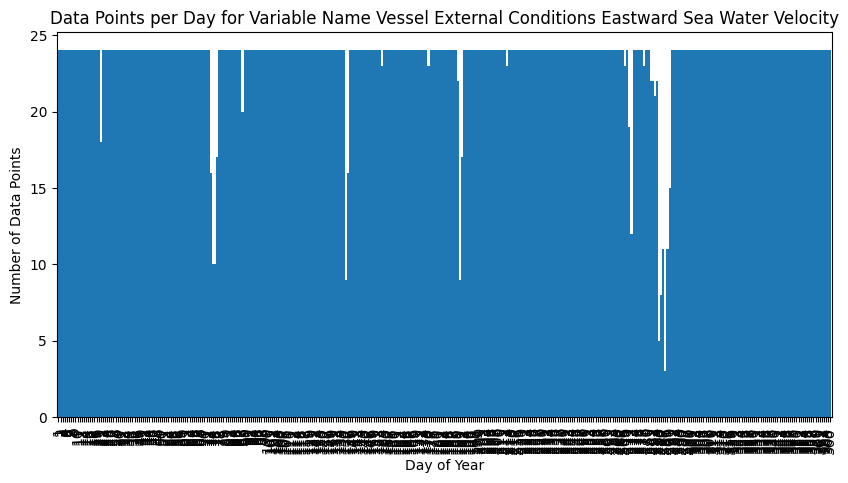

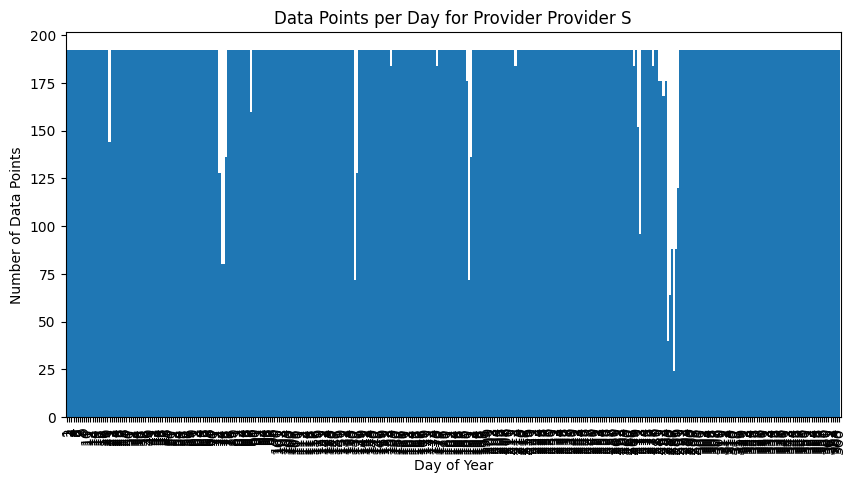

Variable Name: Vessel External Conditions Northward Wind Velocity
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


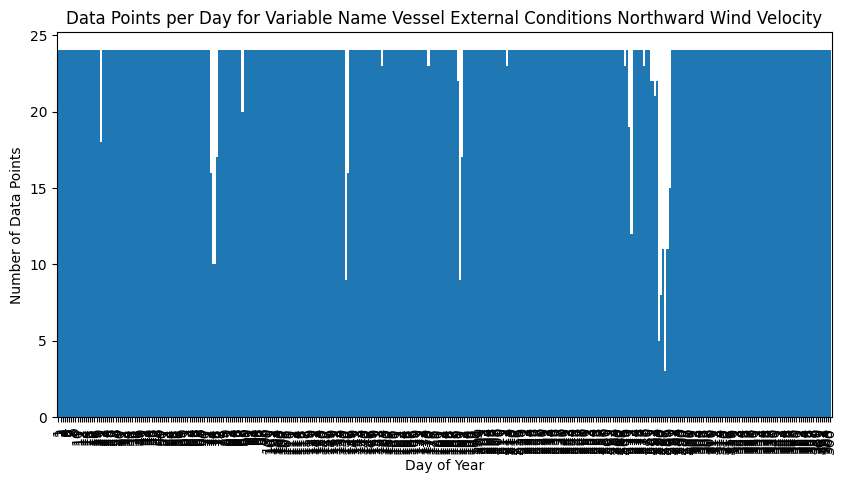

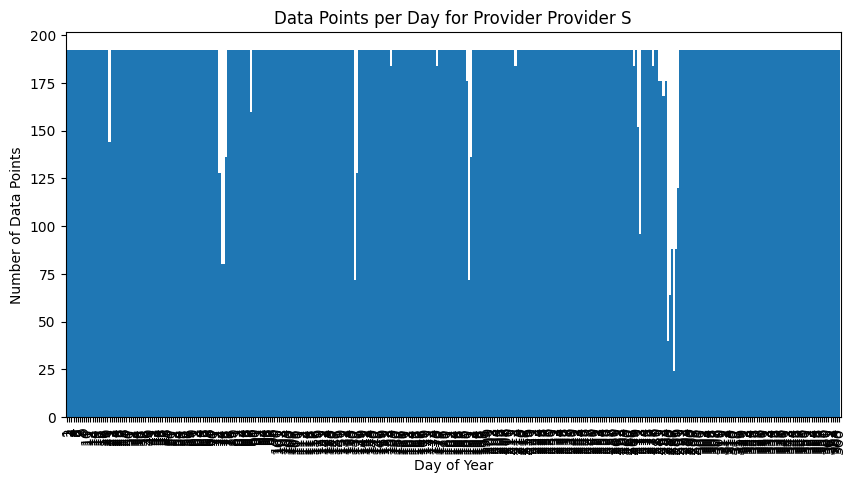

Variable Name: Vessel External Conditions Northward Sea Water Velocity
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


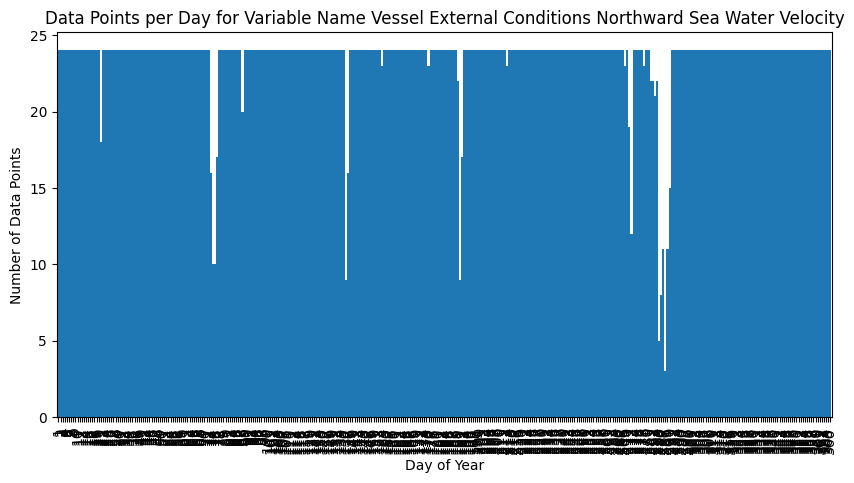

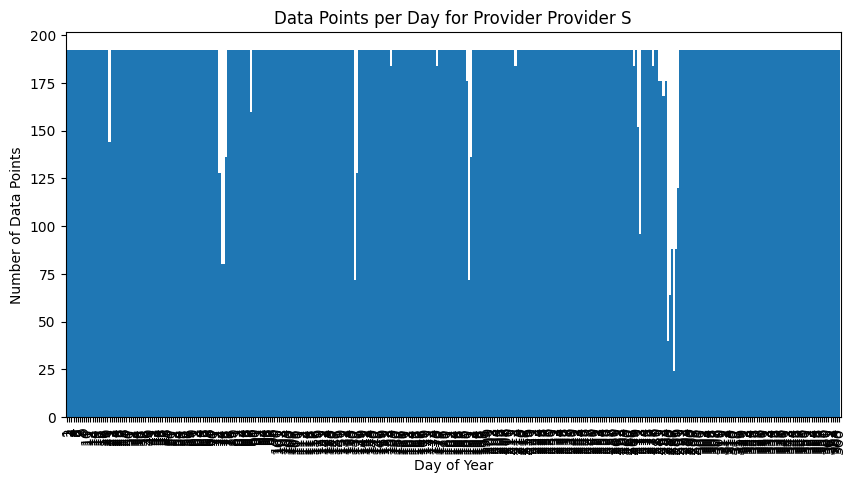

Variable Name: Vessel External Conditions Wind True Speed
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


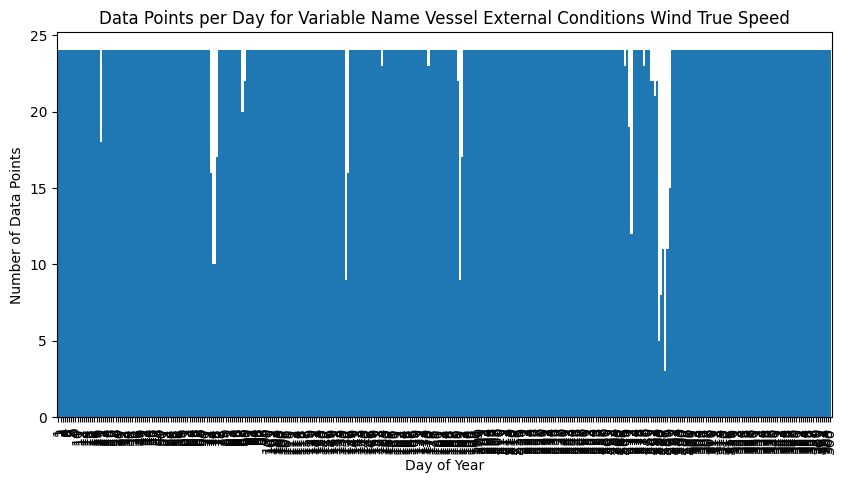

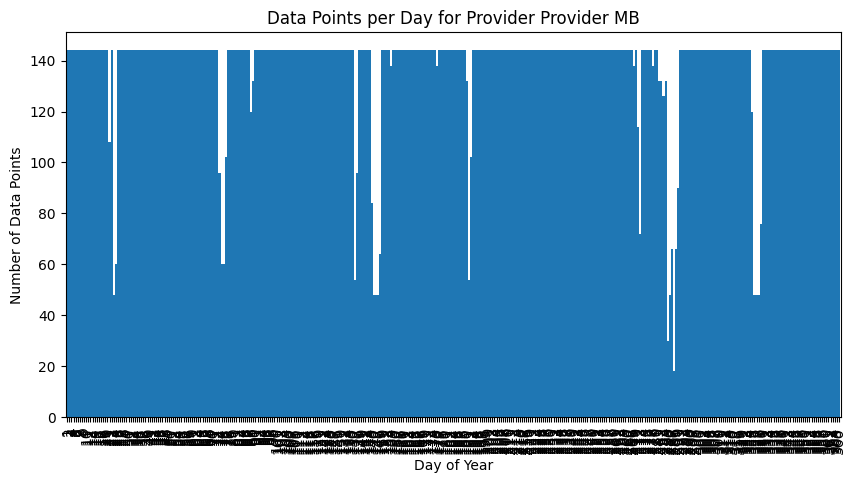

Variable Name: Vessel External Conditions Wave Period
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


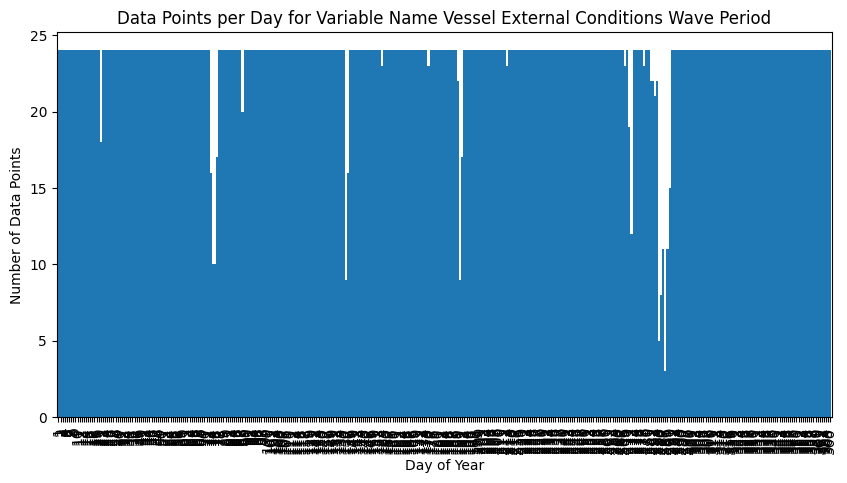

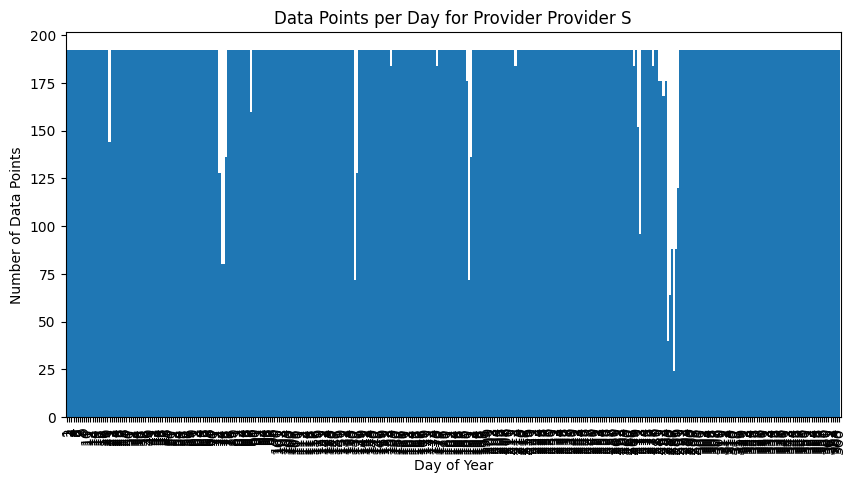

Variable Name: Vessel External Conditions Eastward Sea Water Velocity
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


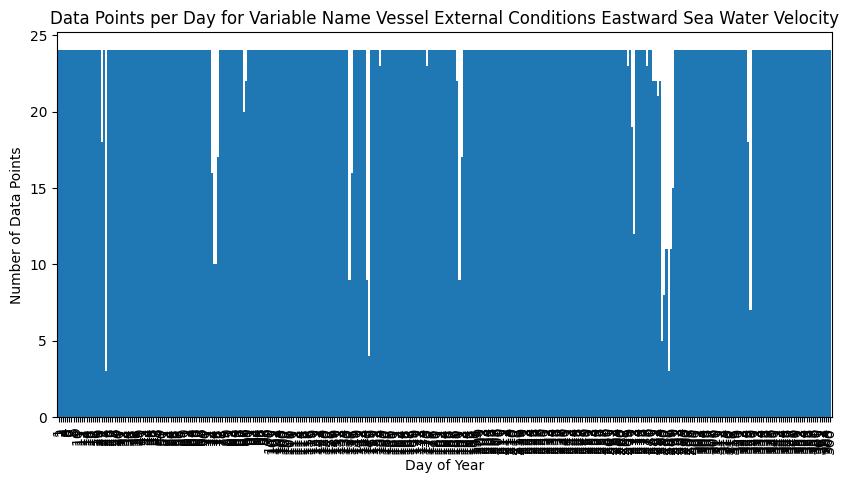

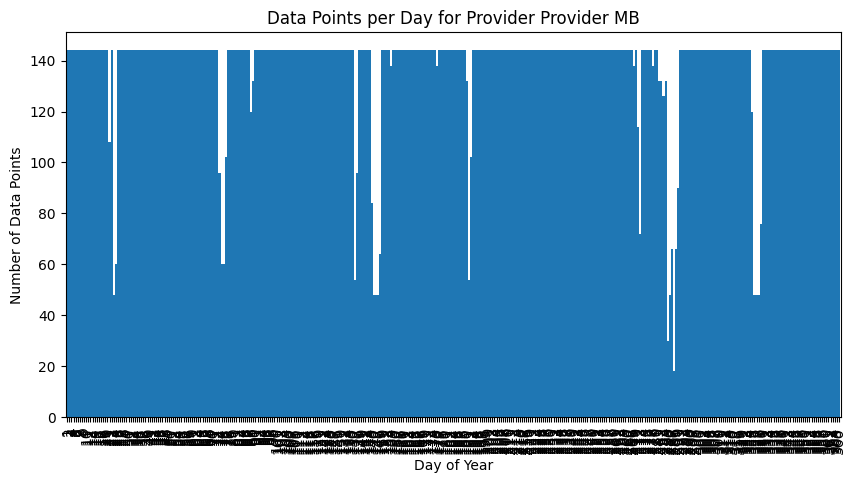

Variable Name: Vessel External Conditions Wave True Angle
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


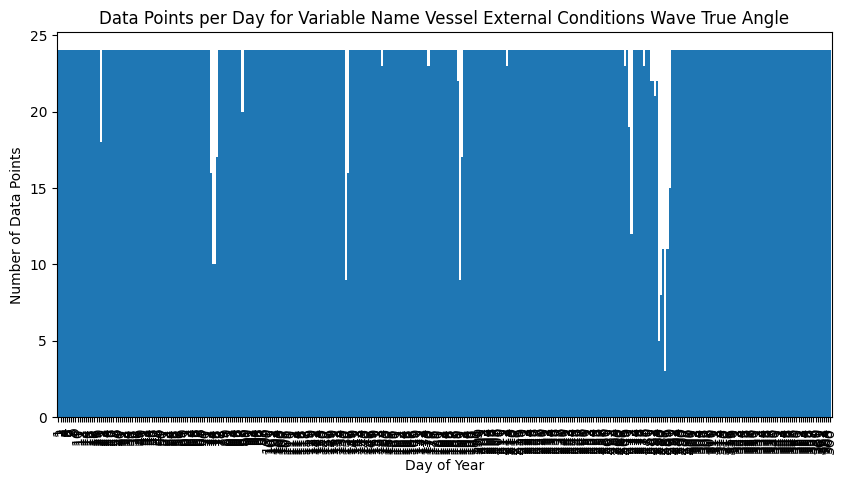

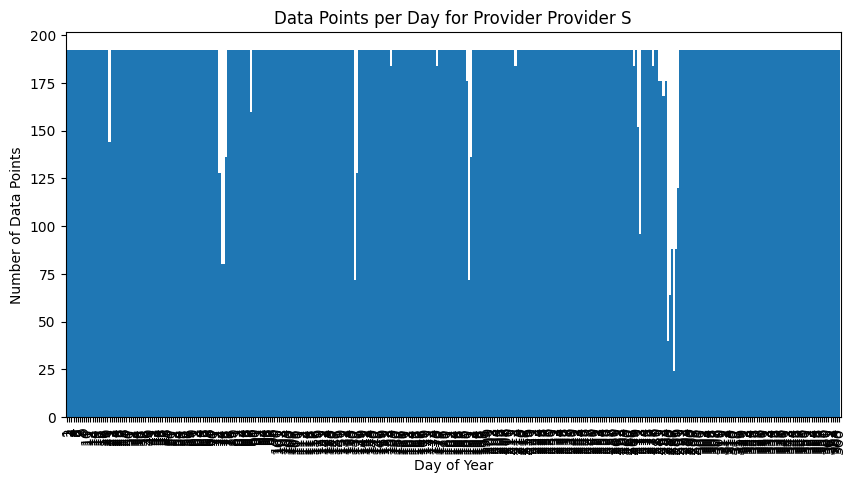

Variable Name: Vessel External Conditions Wave Significant Height
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


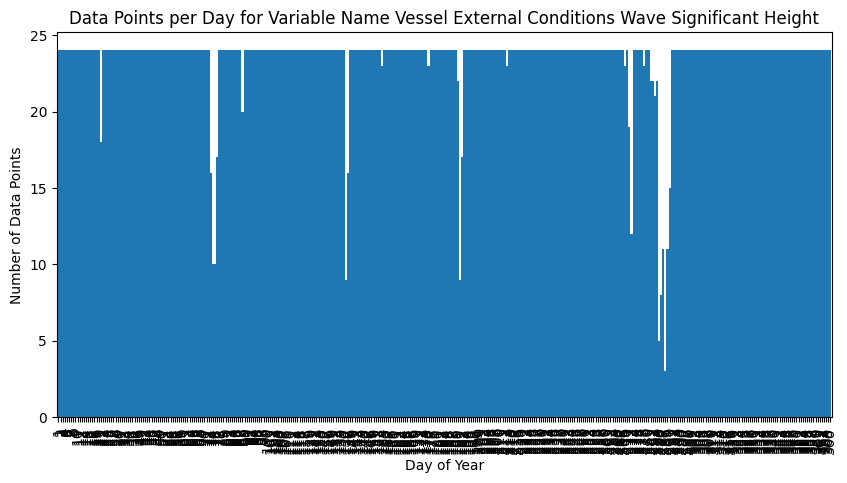

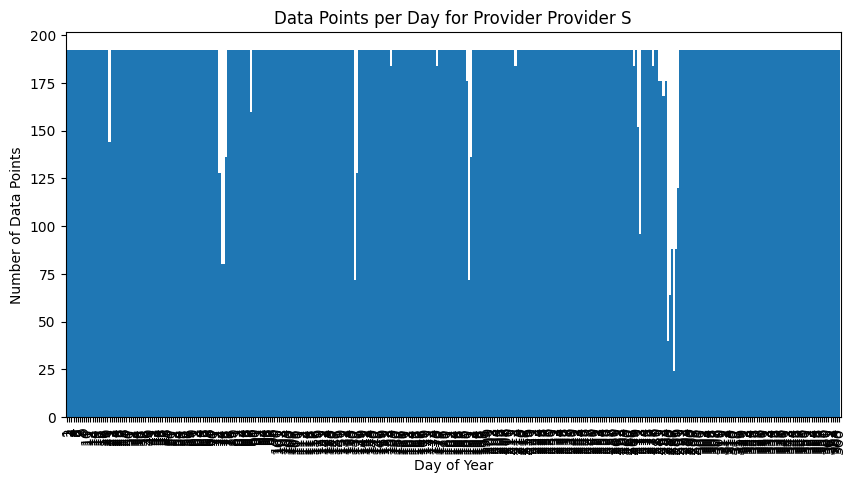

Variable Name: Vessel External Conditions Swell Significant Height
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


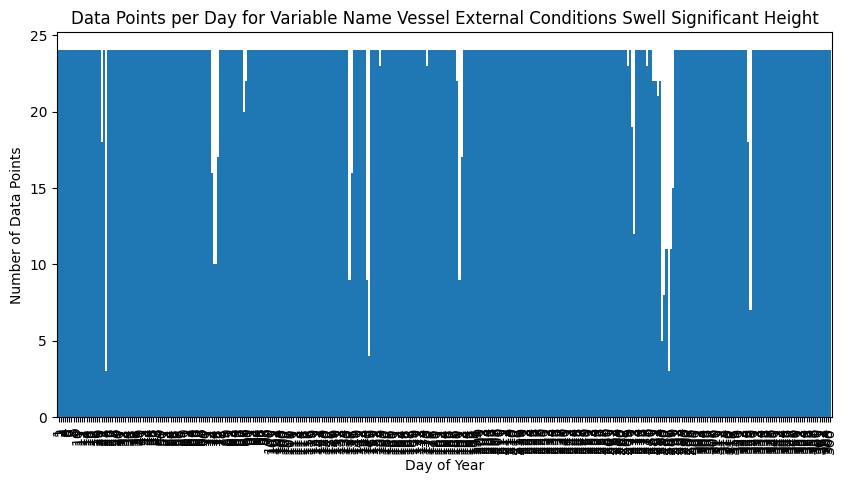

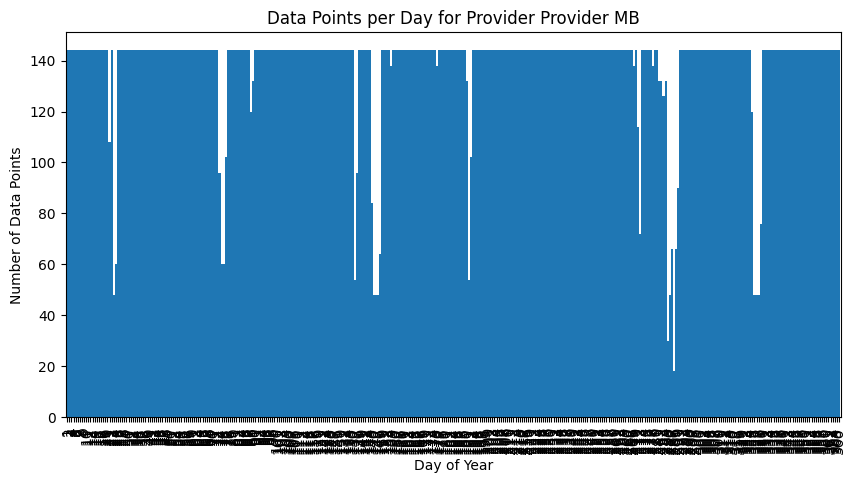

Variable Name: Vessel External Conditions Wind True Angle
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


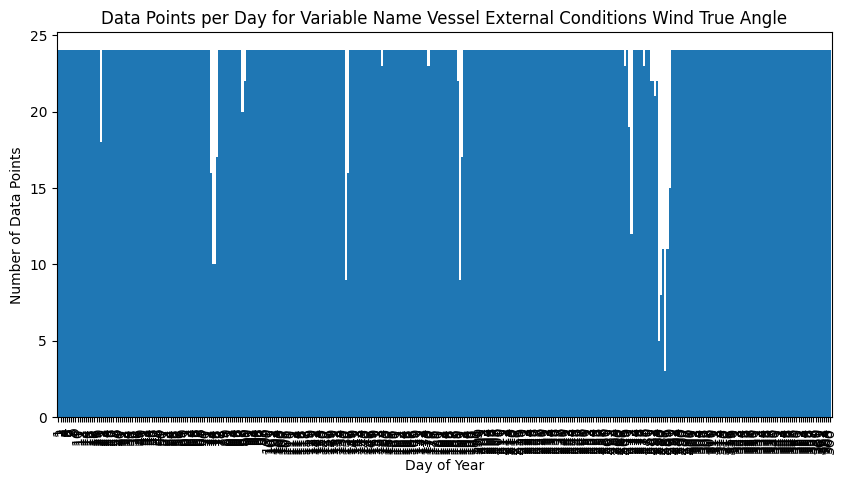

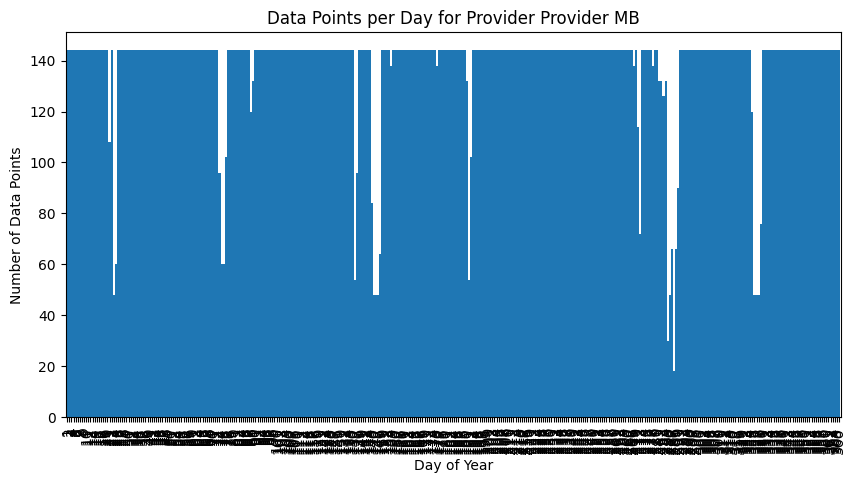

Variable Name: Vessel External Conditions Eastward Wind Velocity
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


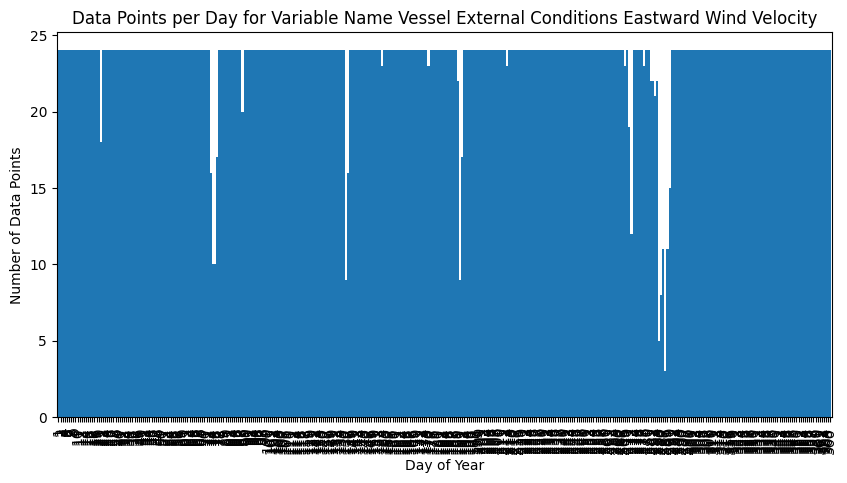

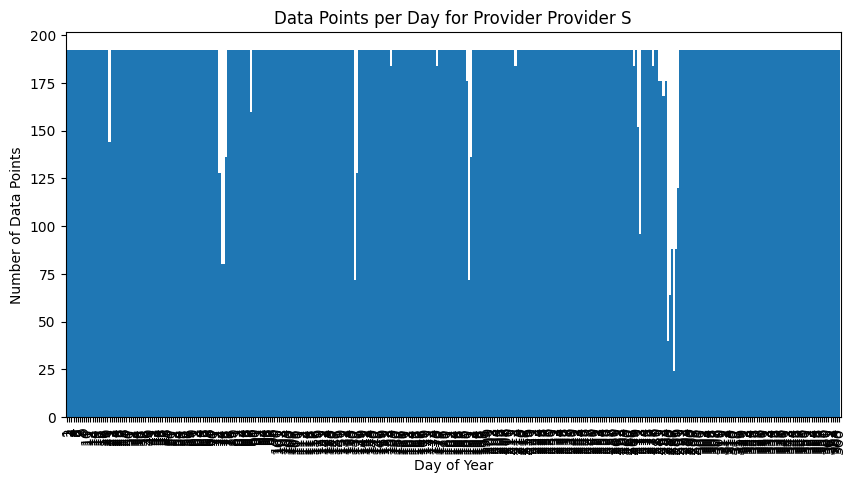

Variable Name: Vessel External Conditions Wave Significant Height
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


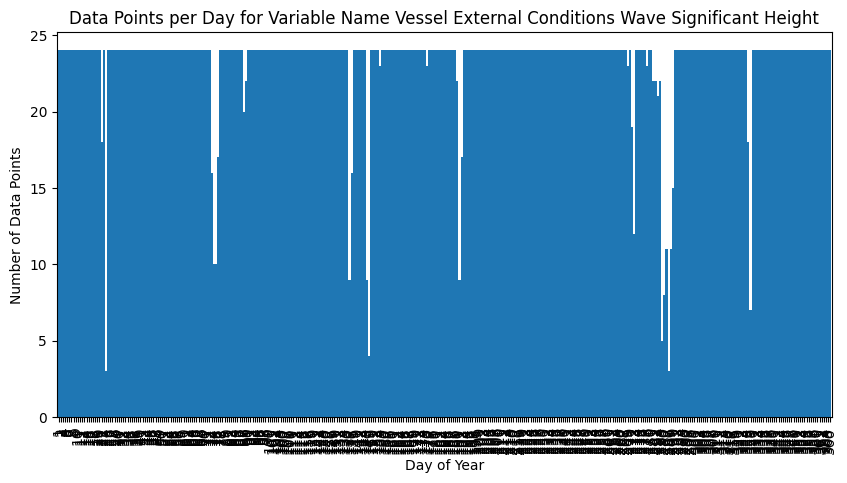

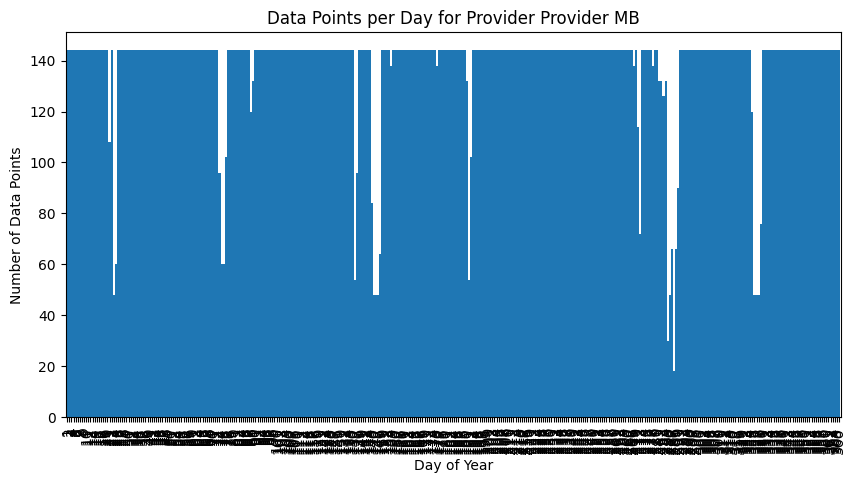

Variable Name: Vessel External Conditions Northward Sea Water Velocity
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


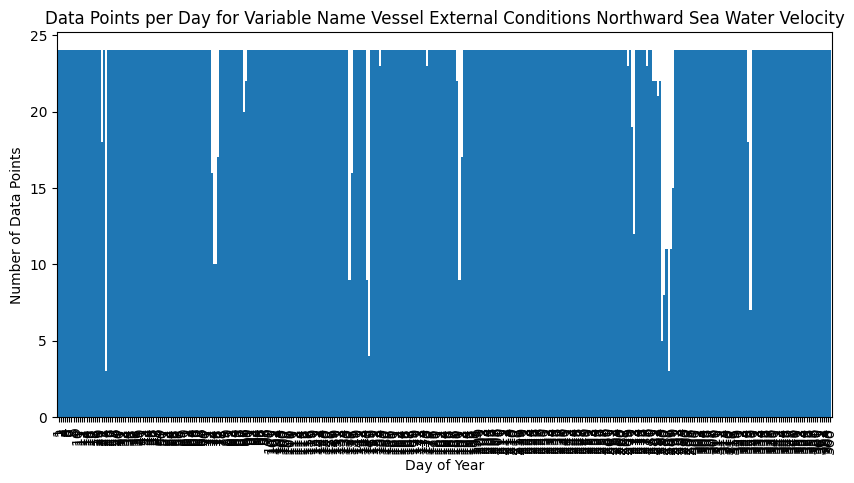

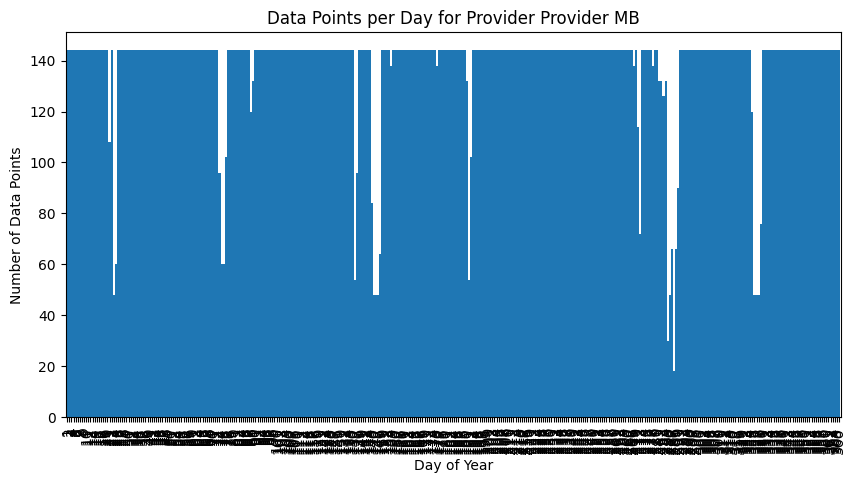

Variable Name: Vessel External Conditions Sea Water Temperature
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


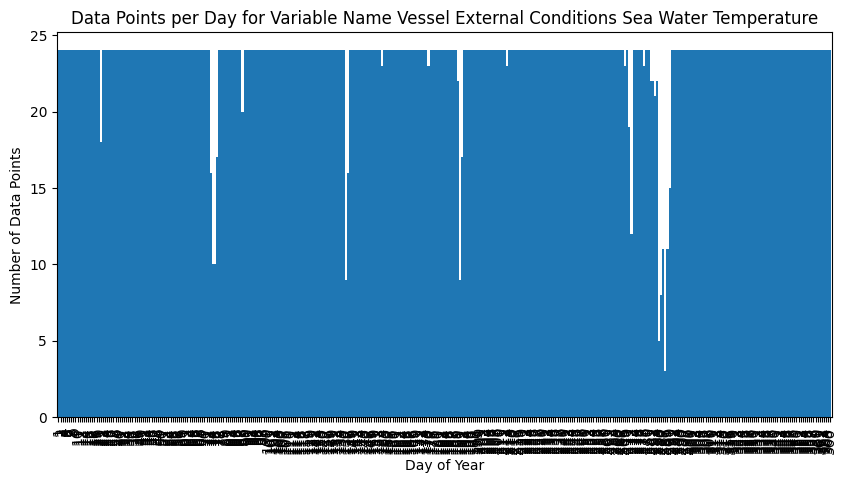

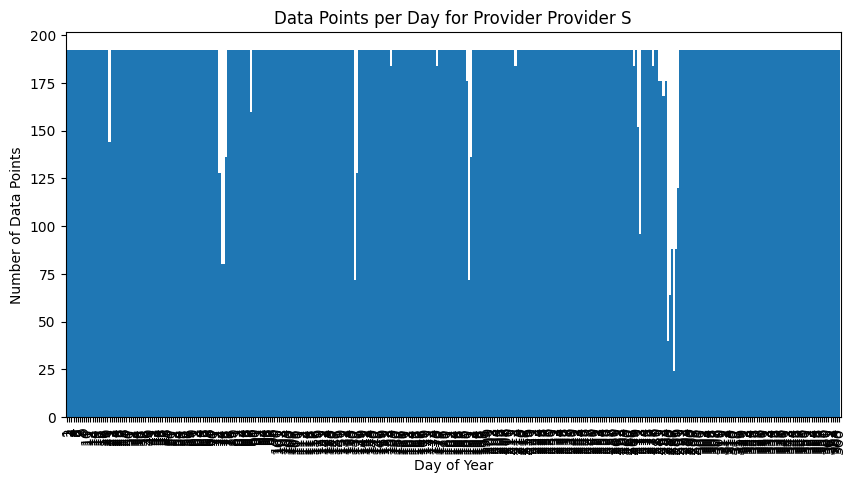

Variable Name: Vessel External Conditions Wind Relative Angle
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


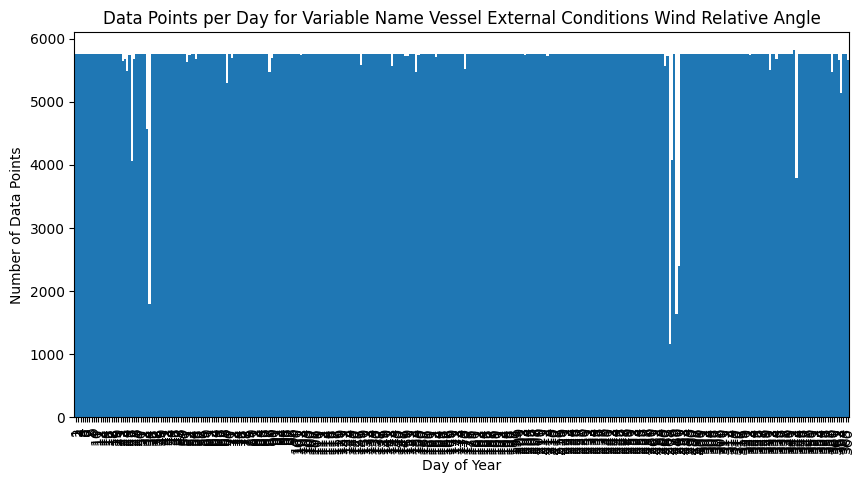

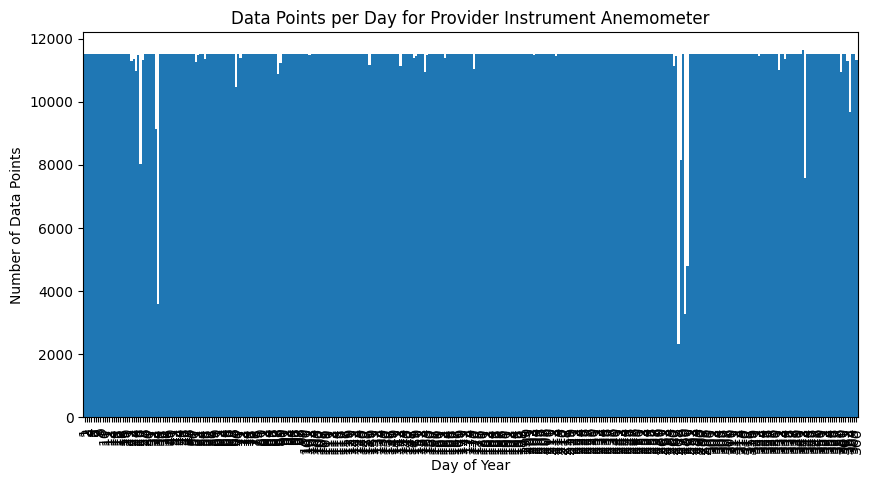

Variable Name: Vessel External Conditions Wind Relative Speed
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


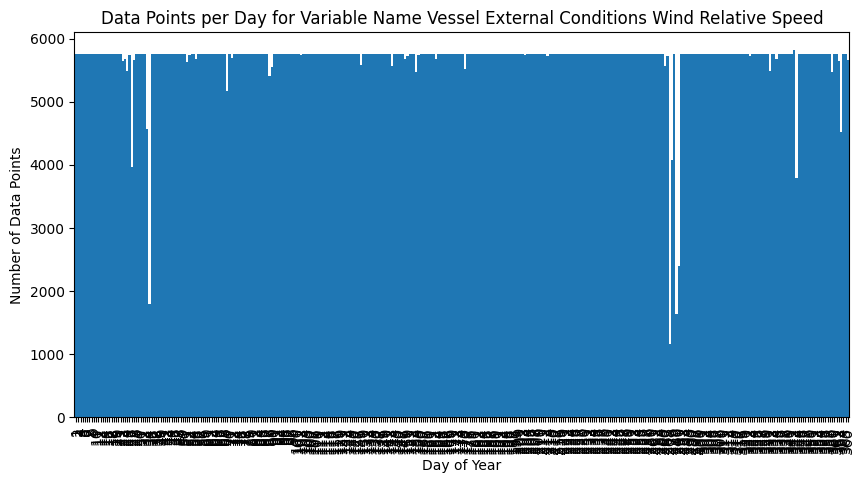

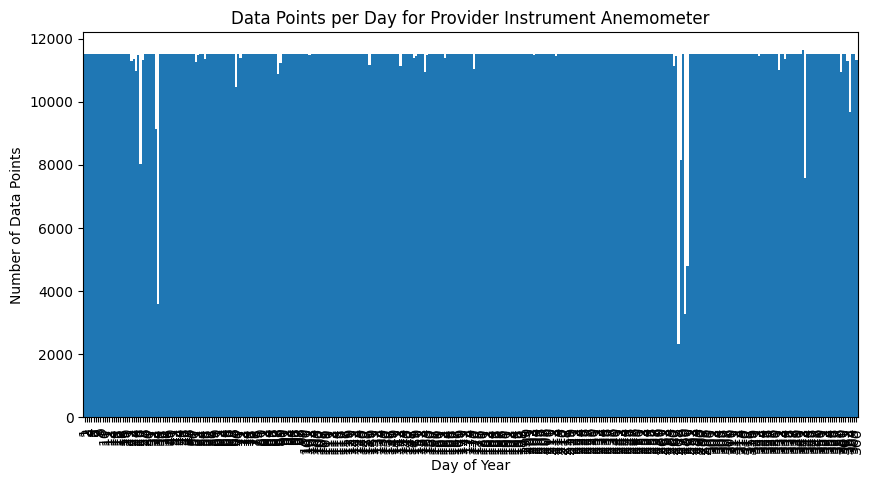

Variable Name: Vessel Hull Over Ground Speed
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


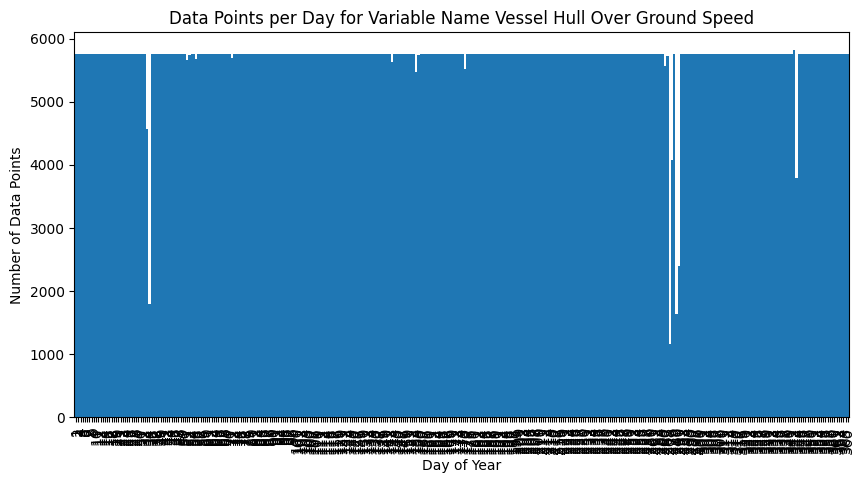

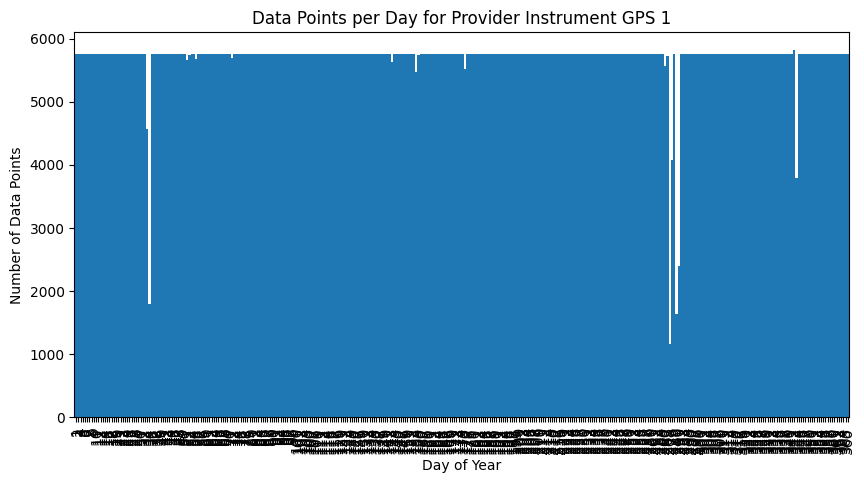

Variable Name: Vessel Hull Through Water Longitudinal Speed
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


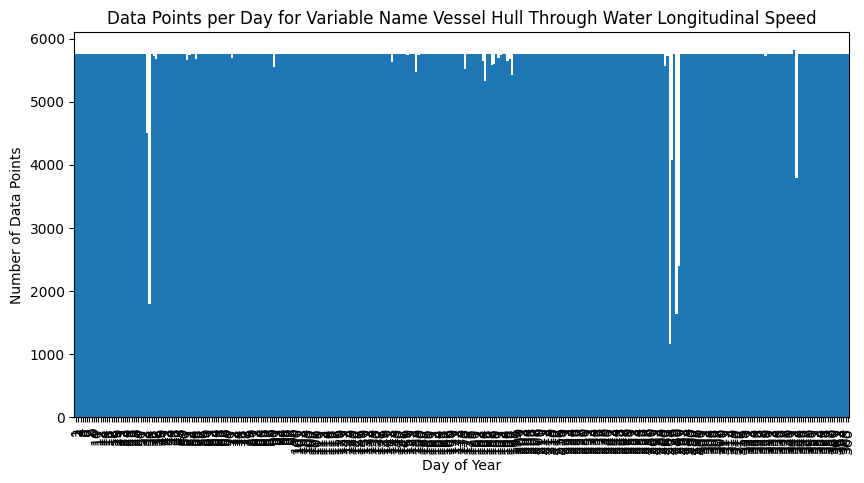

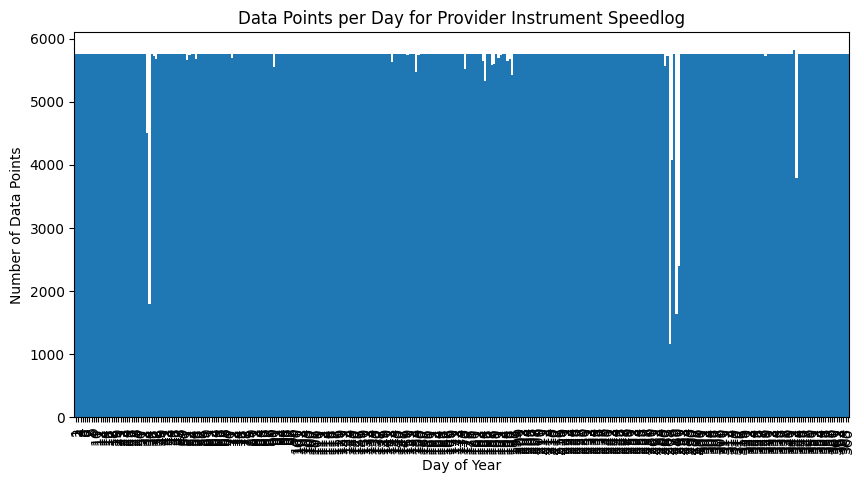

Variable Name: Vessel Hull Relative To Transducer Water Depth
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


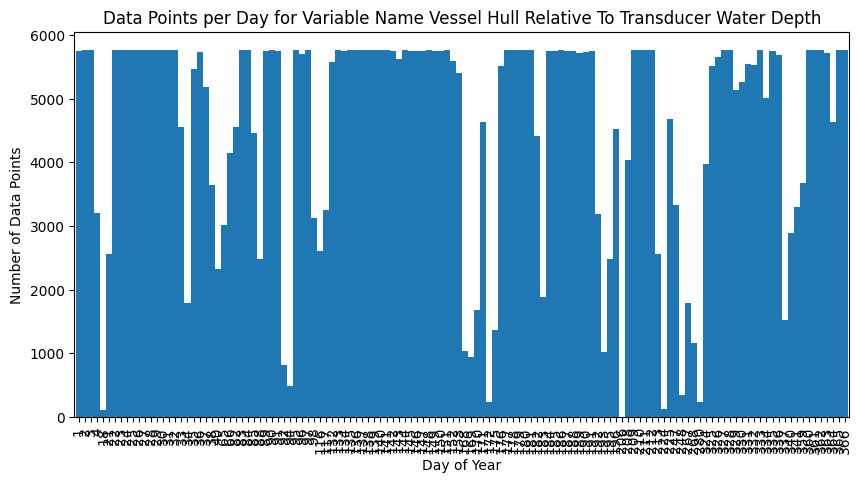

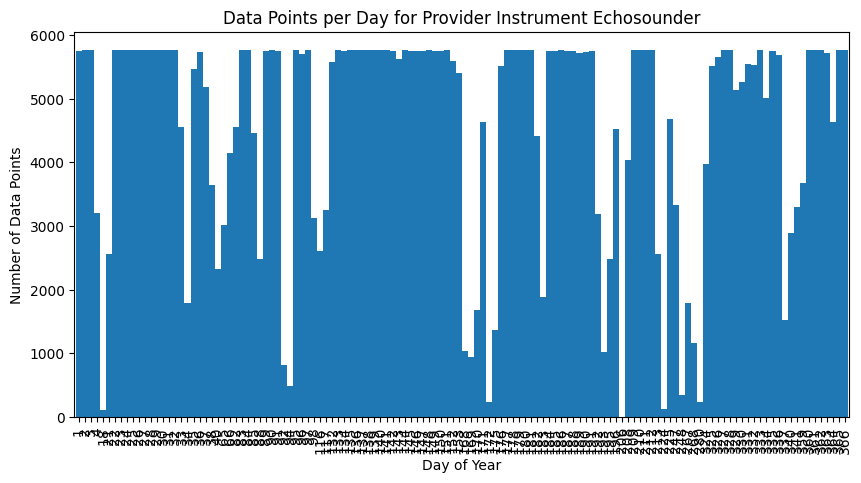

Variable Name: Vessel Hull Heading True Angle
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


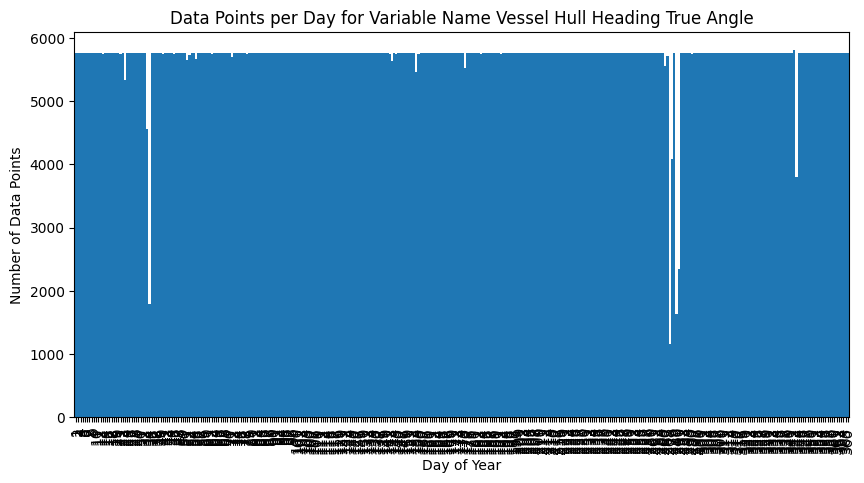

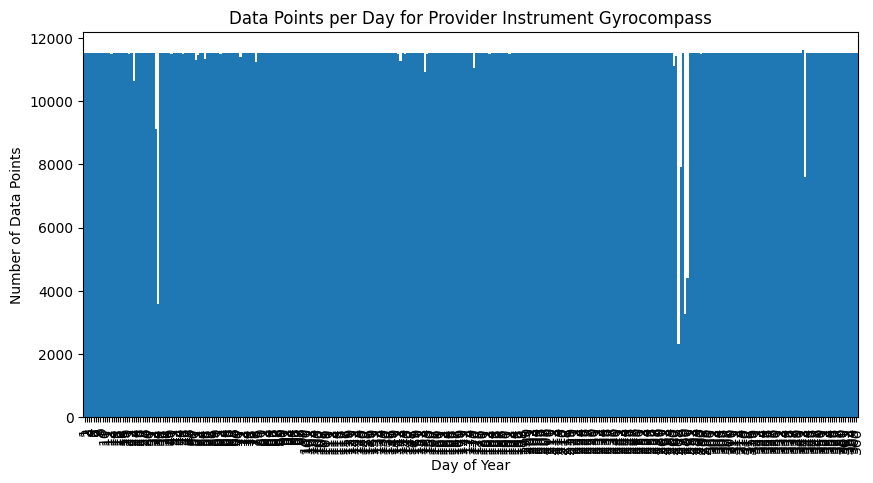

Variable Name: Vessel Hull Heading Turn Rate
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


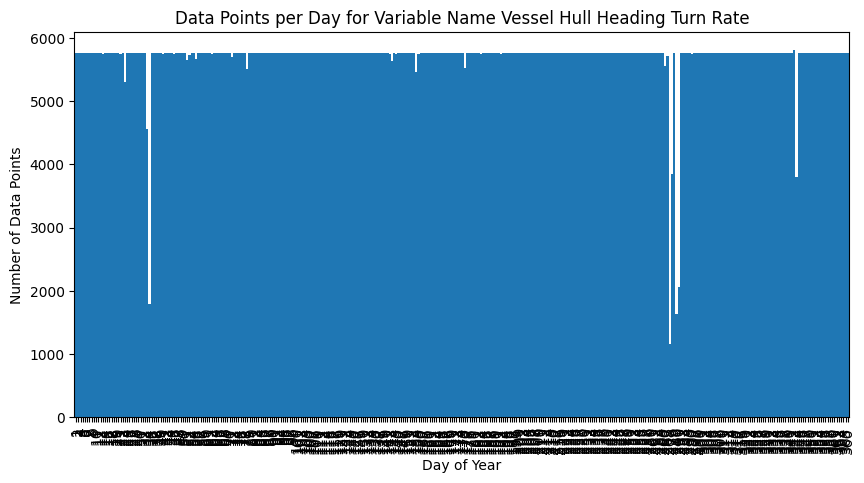

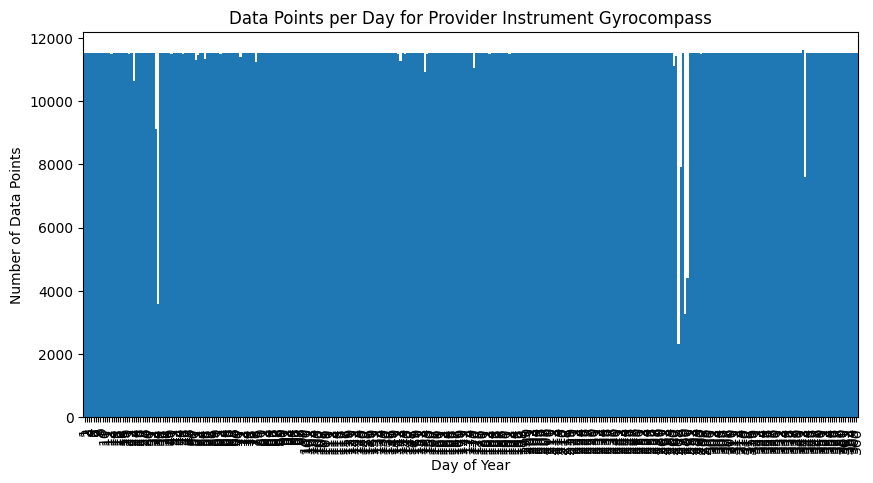

Variable Name: Main Engine Turbocharger Rotational Speed
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


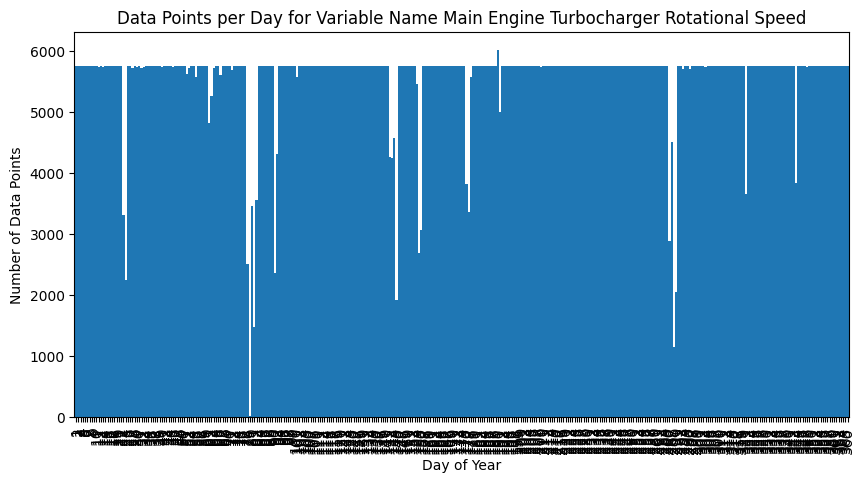

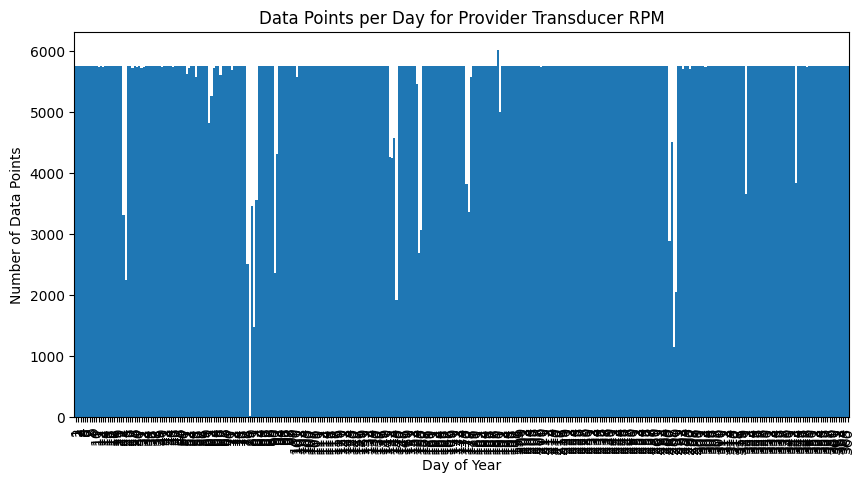

Variable Name: Main Engine Scavenging Air Pressure
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


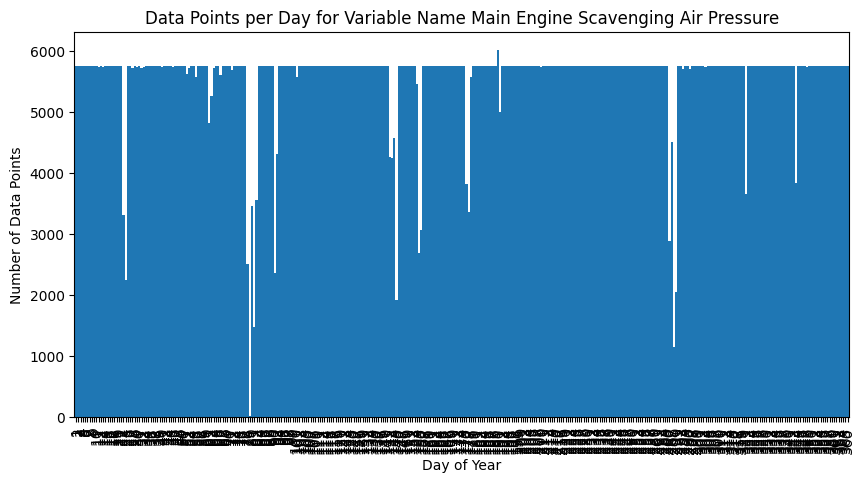

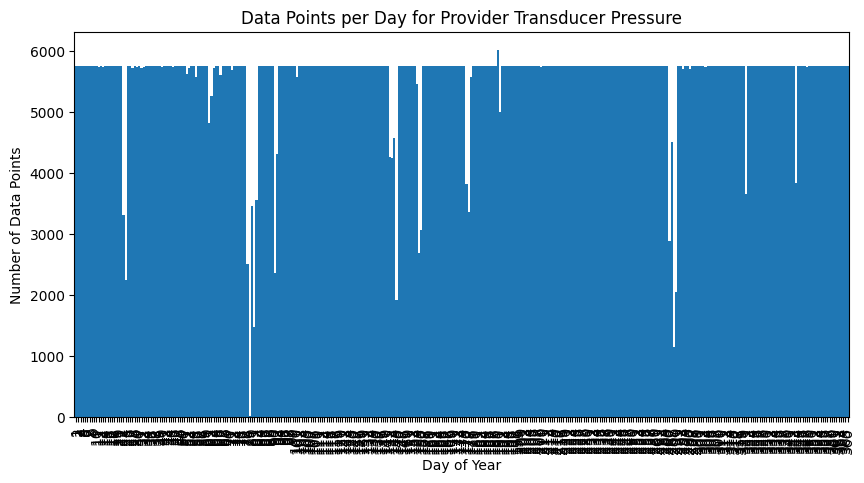

Variable Name: Main Engine Fuel Load %
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


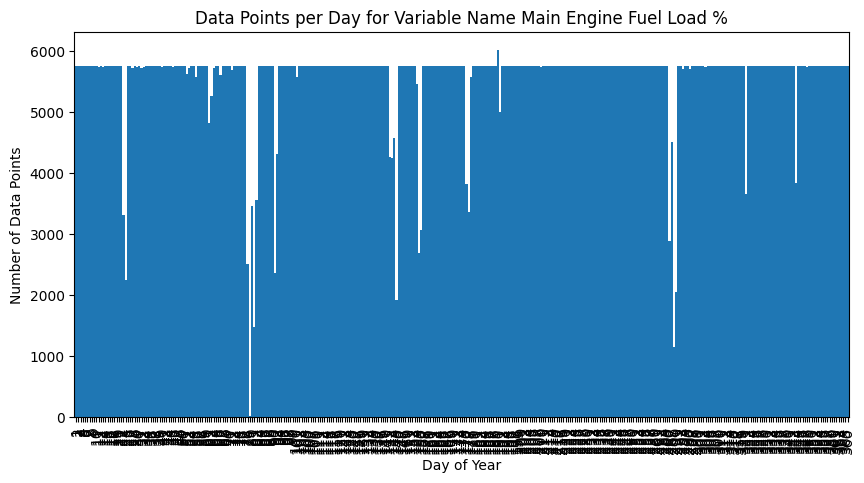

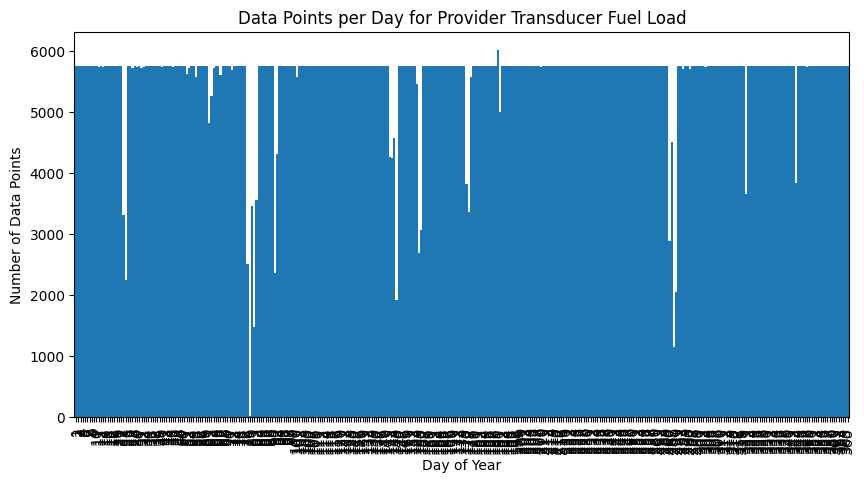

Variable Name: Vessel Hull MidP Draft
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


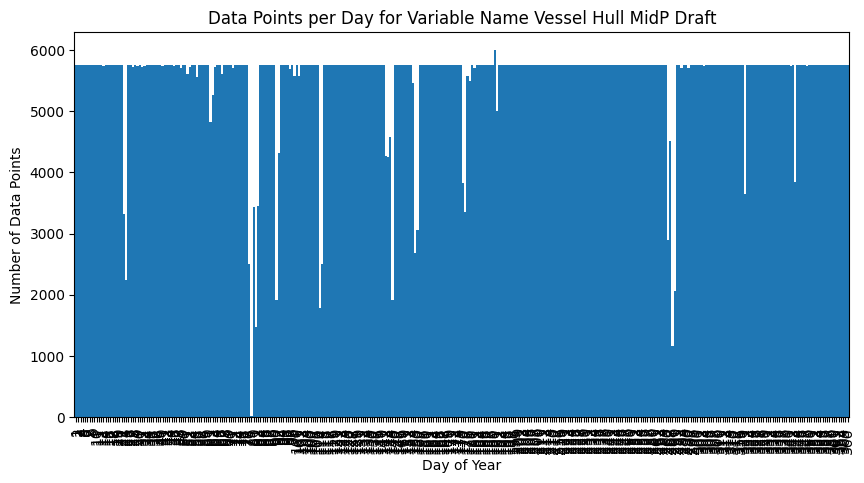

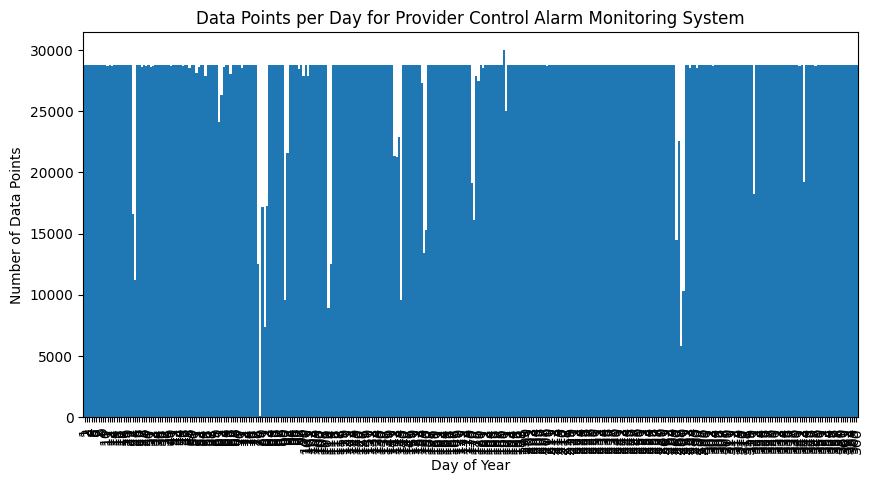

Variable Name: Vessel Hull Fore Draft
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


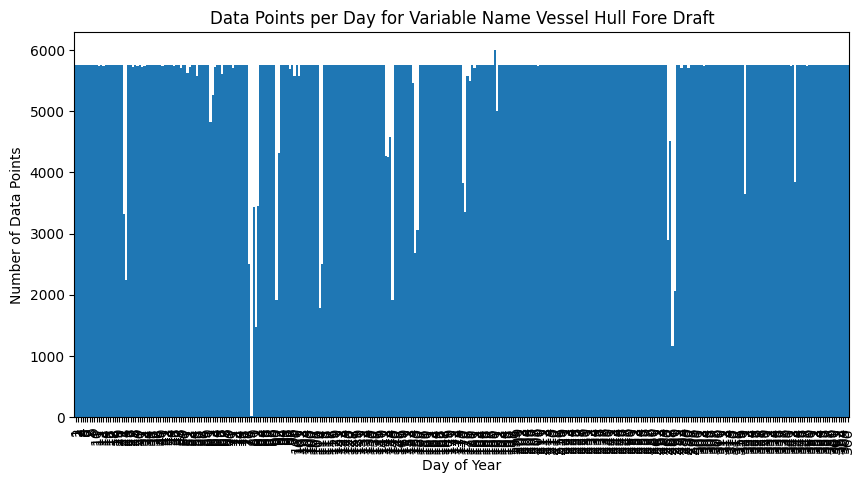

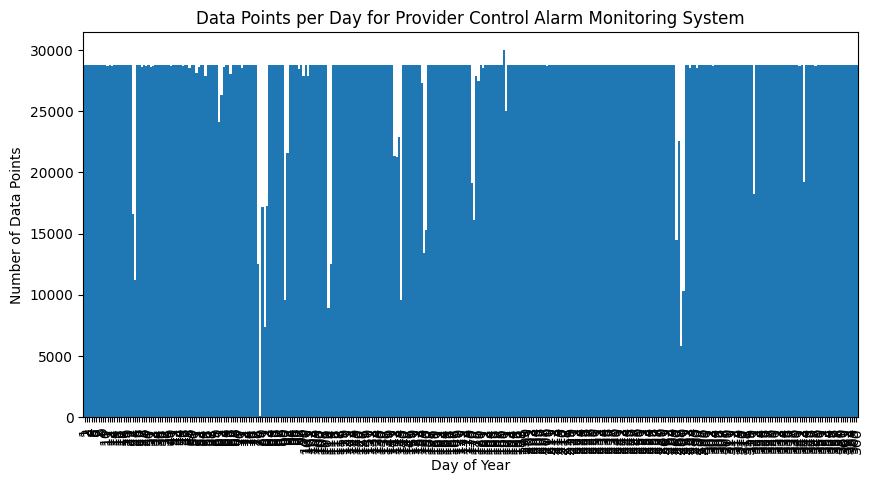

Variable Name: Vessel Hull MidS Draft
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


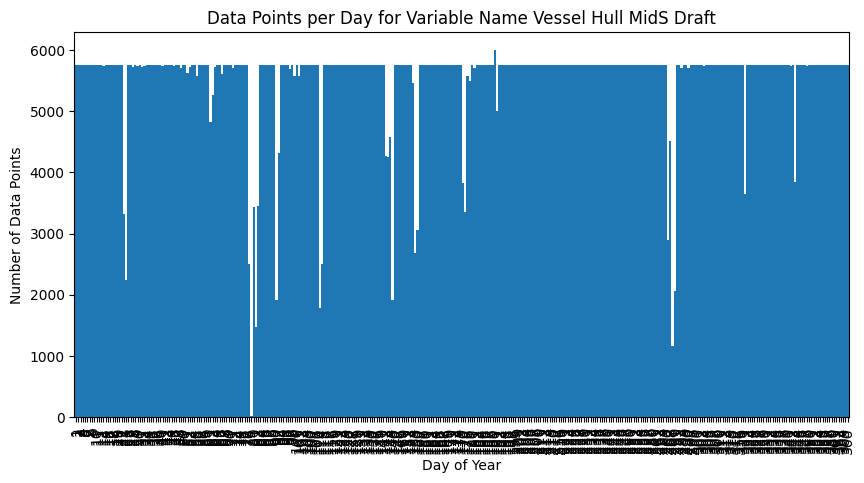

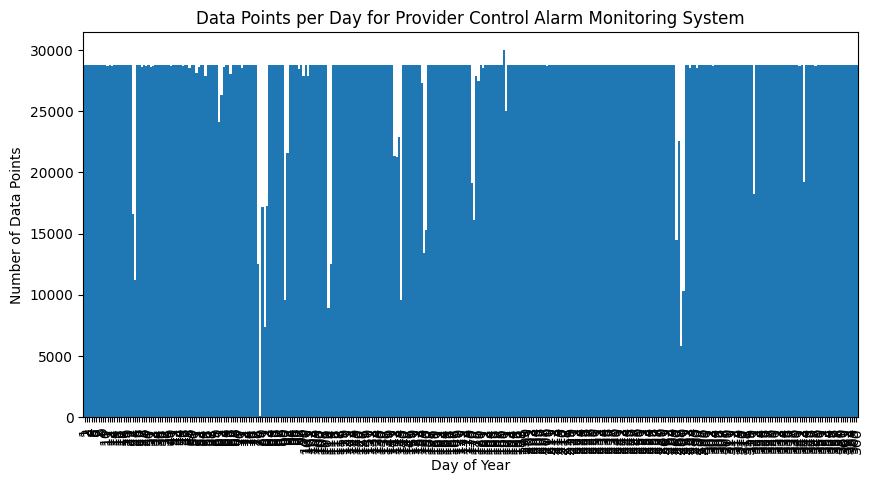

Variable Name: Vessel Hull Aft Draft
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


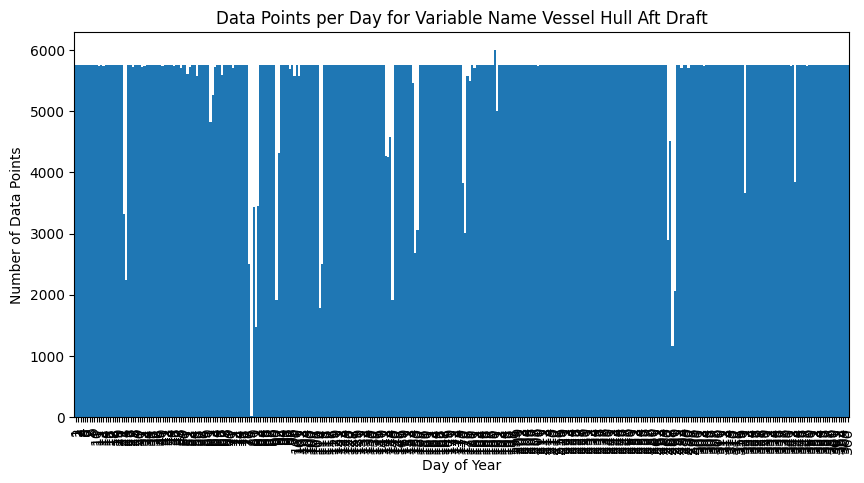

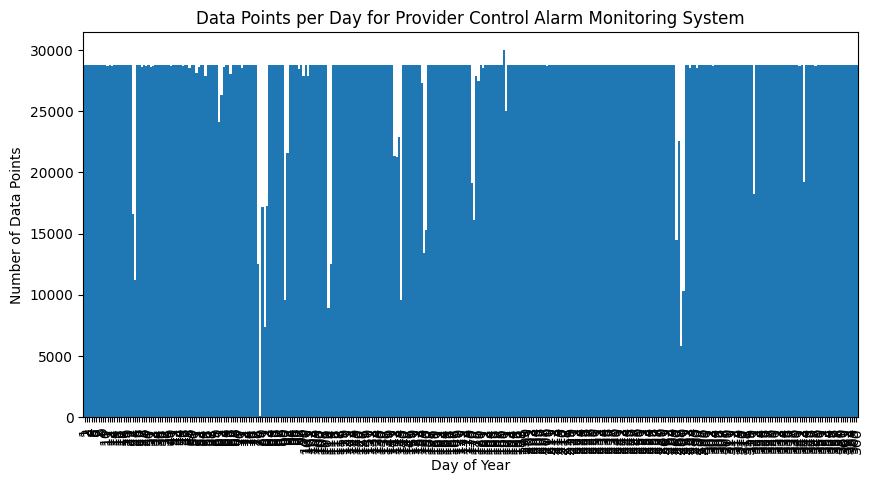

Variable Name: Main Engine Rotational Speed
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


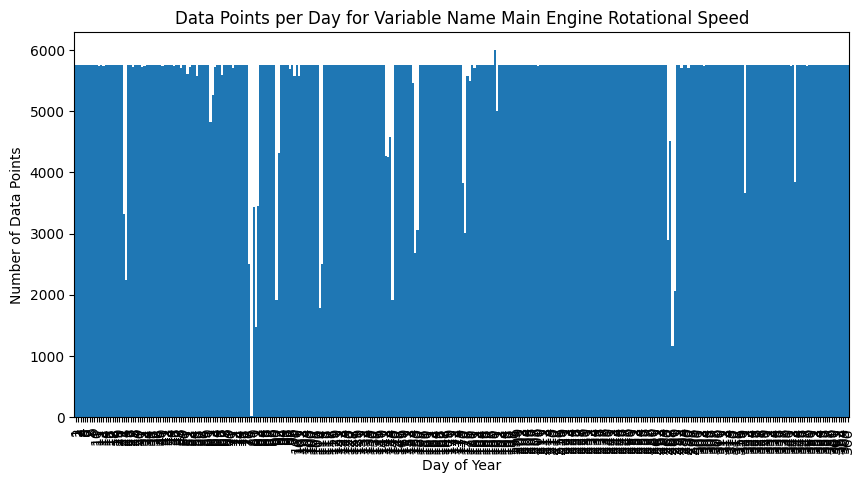

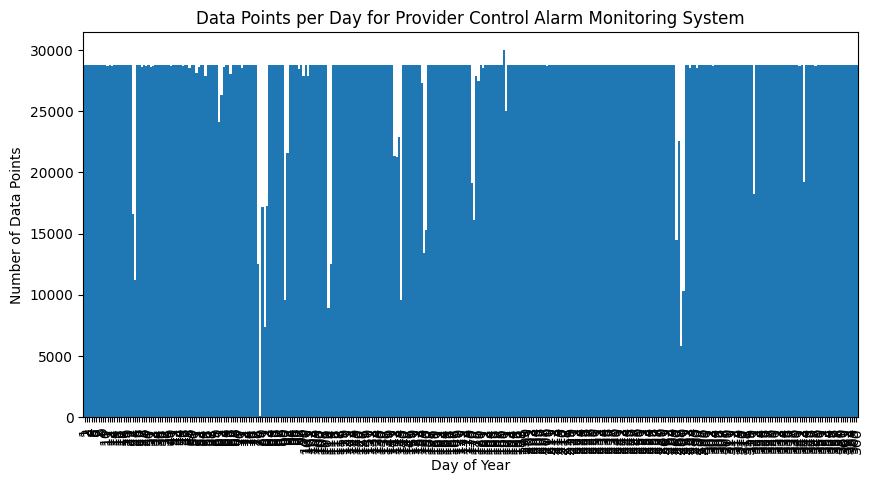

Variable Name: Vessel Propeller Shaft Torque
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


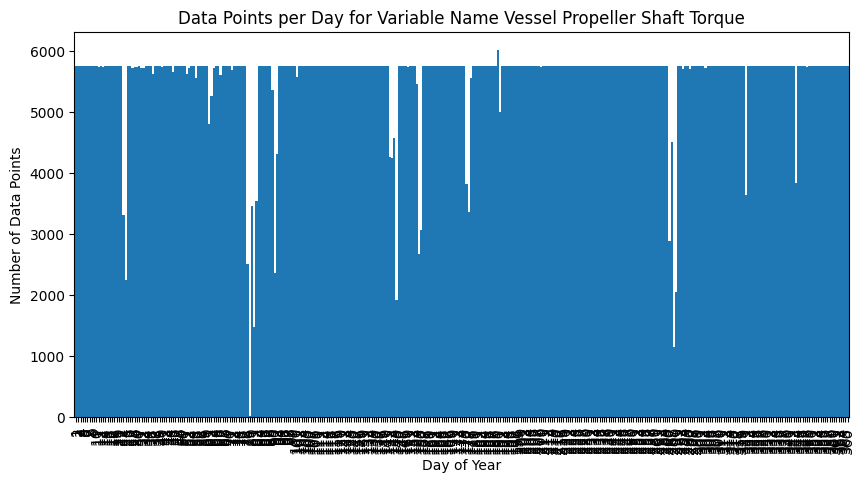

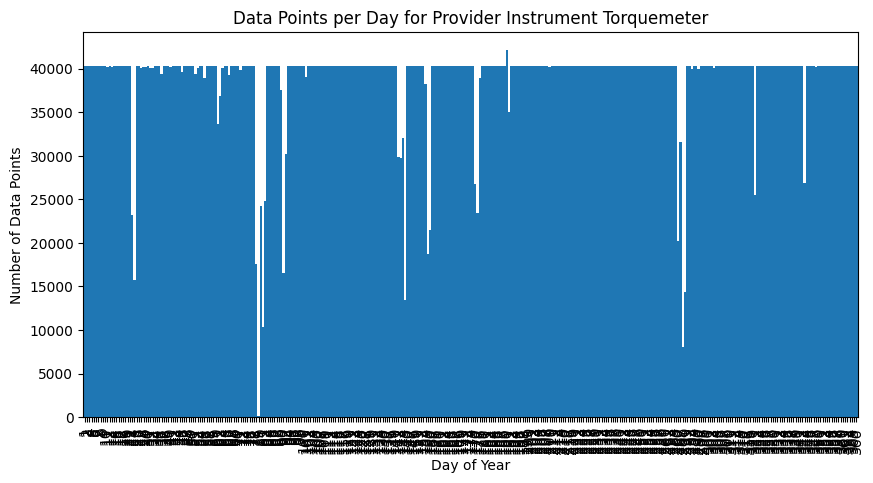

Variable Name: Vessel Propeller Shaft Mechanical Power
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


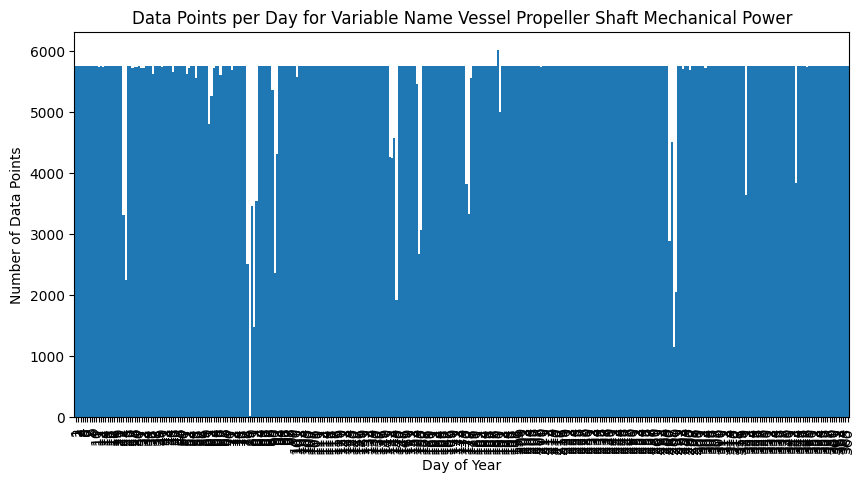

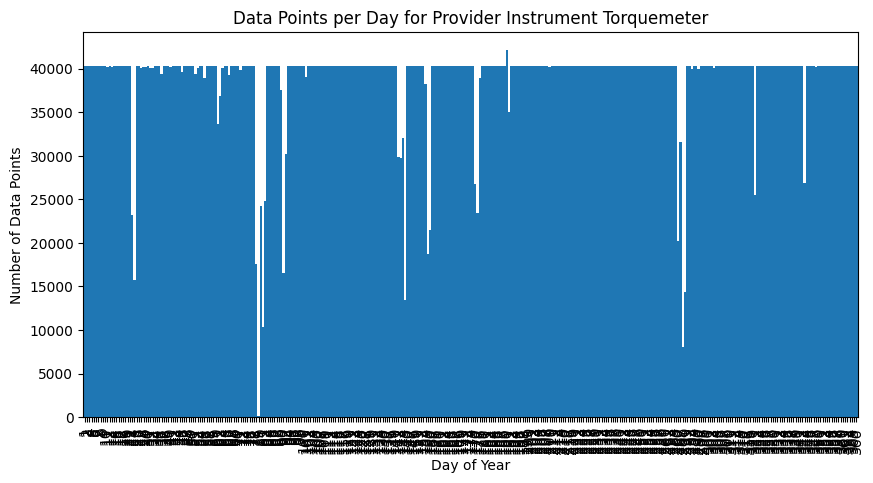

Variable Name: Main Engine Fuel Oil Inlet Mass Flow
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


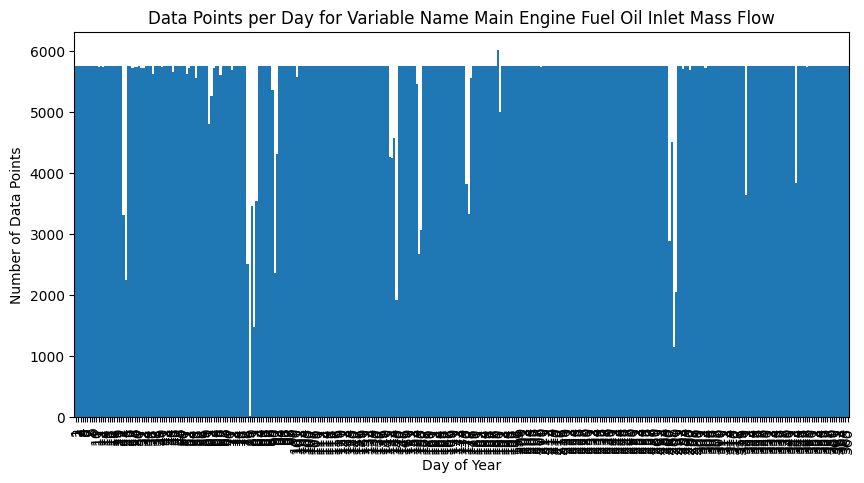

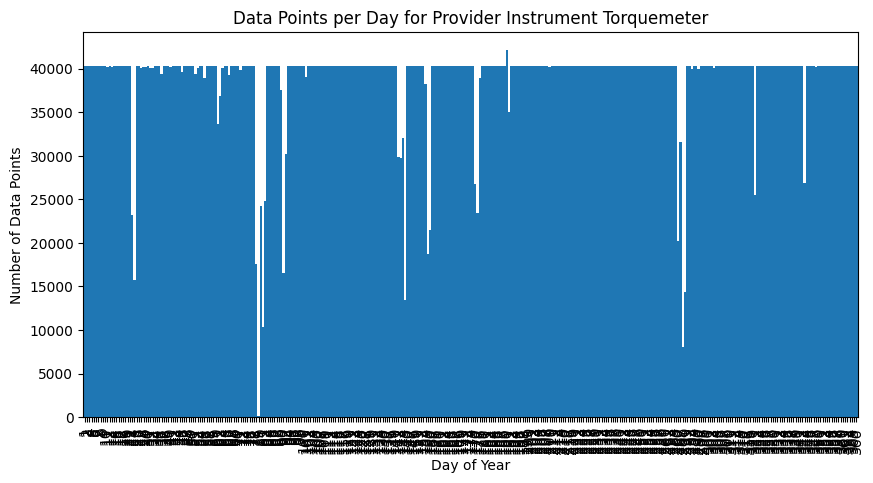

Variable Name: Vessel Propeller Shaft Mechanical Energy
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


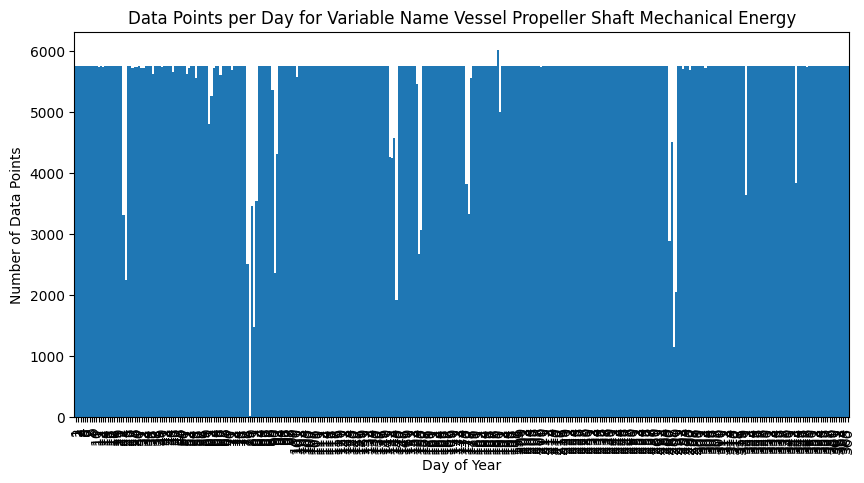

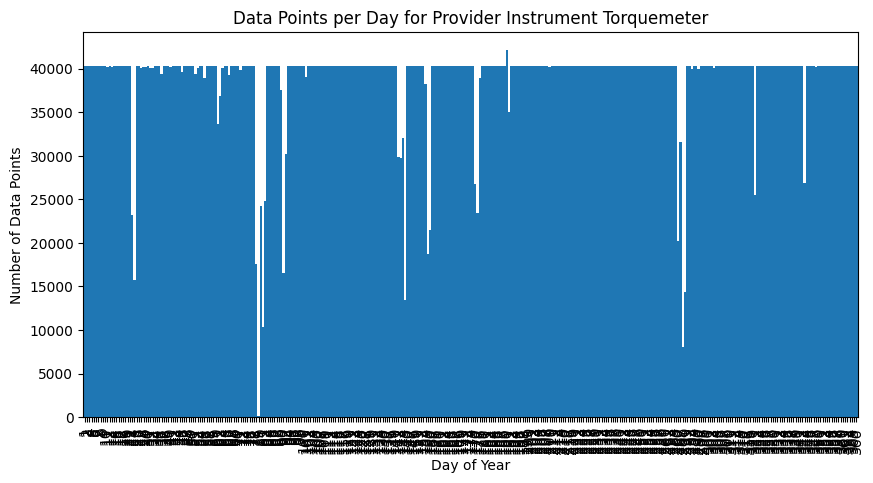

Variable Name: Vessel Propeller Shaft Thrust Force
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


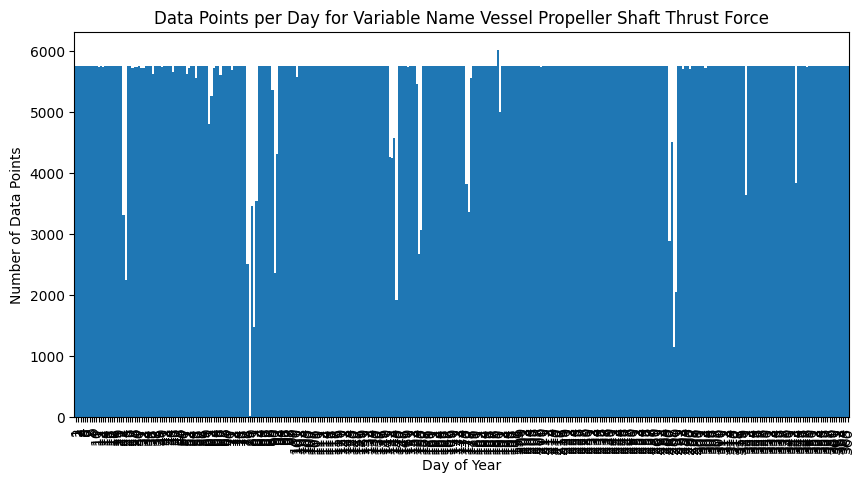

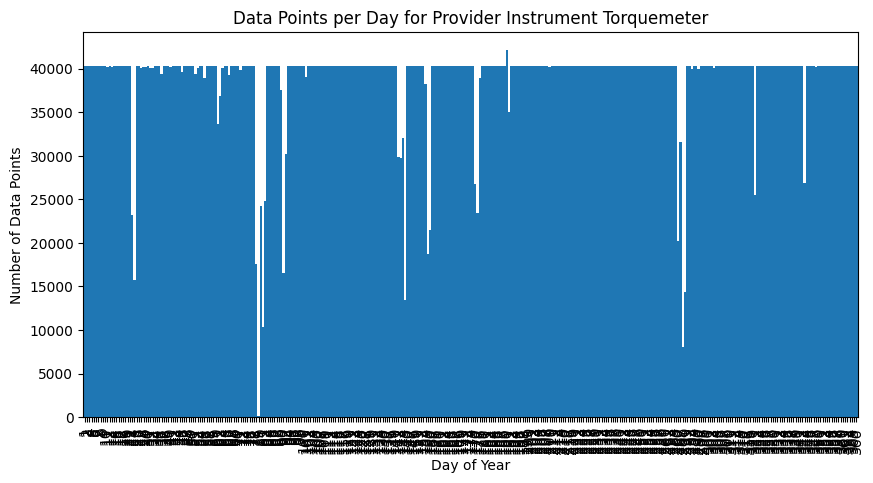

Variable Name: Vessel Propeller Shaft Rotational Speed
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


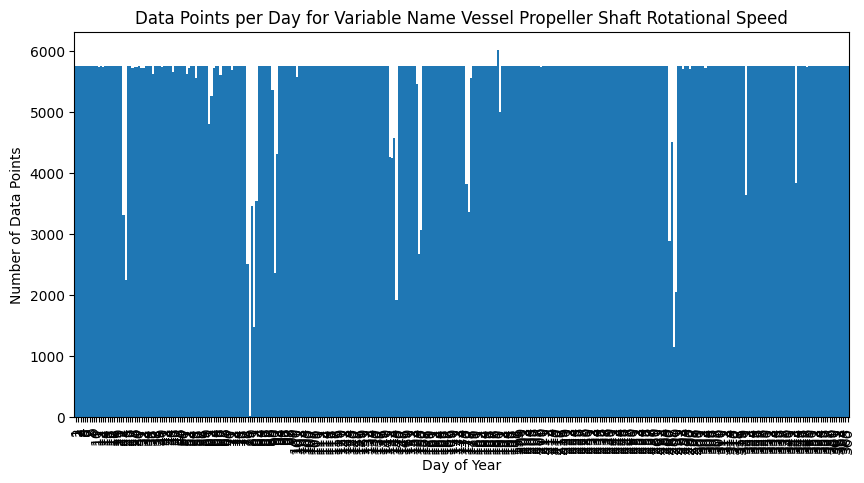

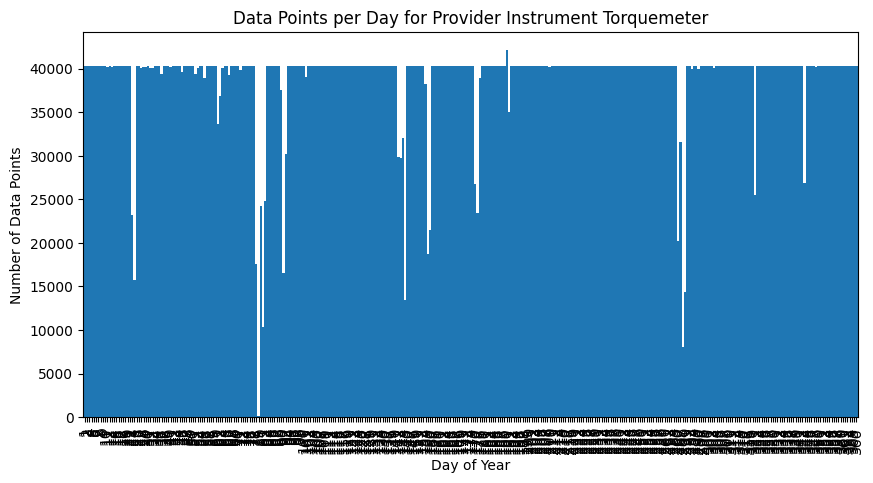

Variable Name: Vessel Propeller Shaft Revolutions (cumulative)
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


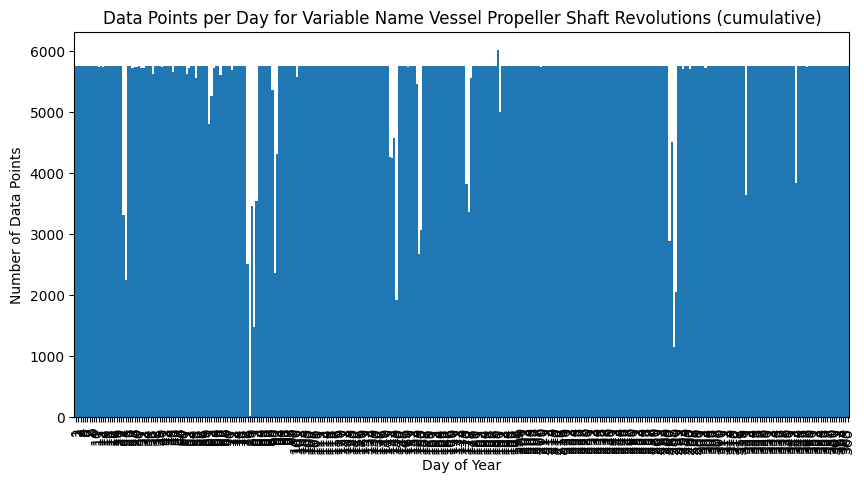

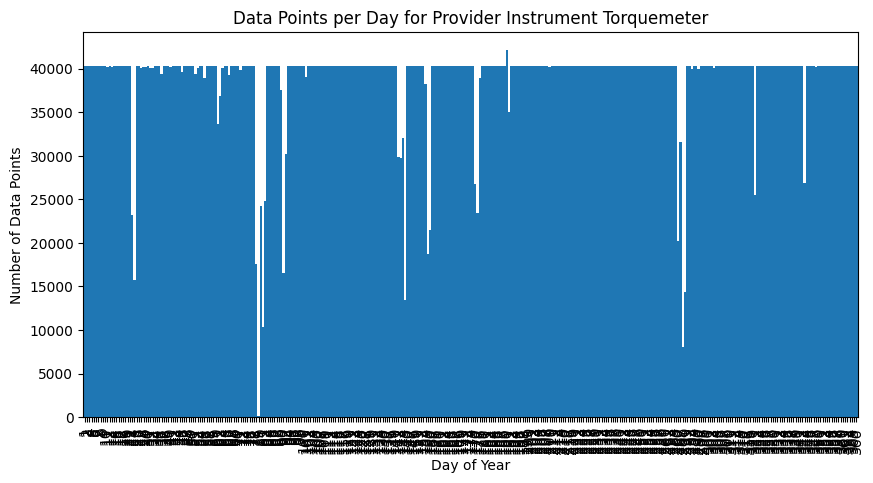

Variable Name: Sea Temp
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


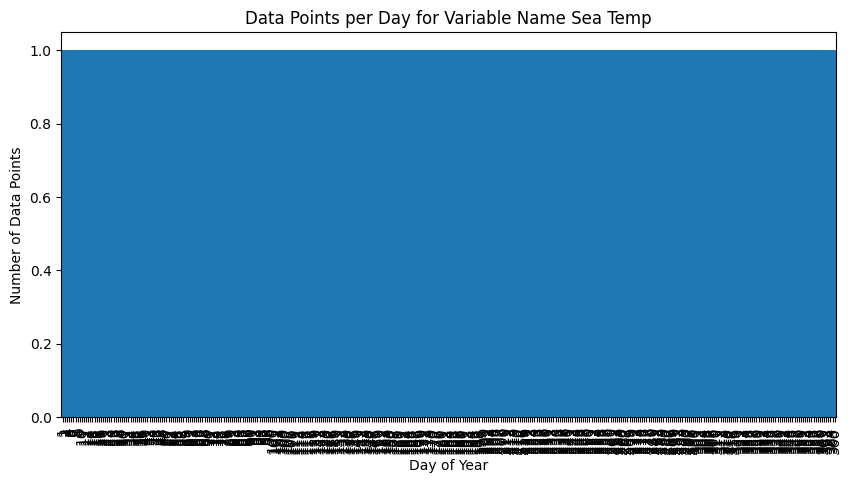

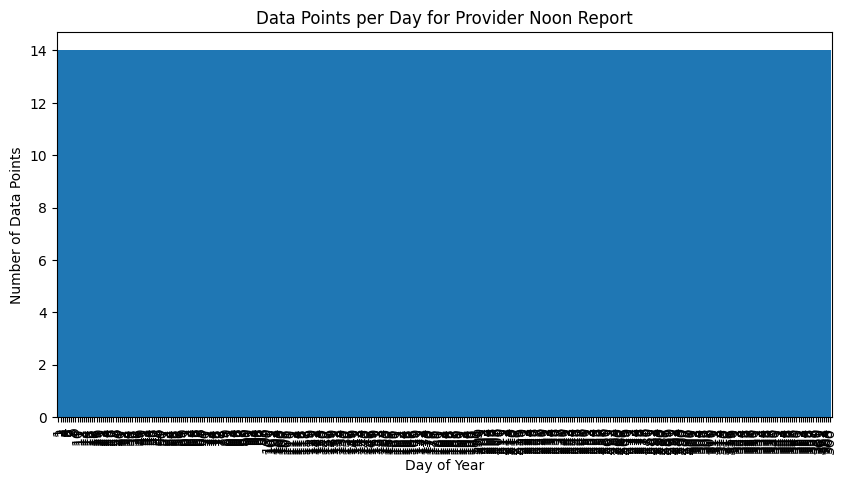

Variable Name: Wind Force
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


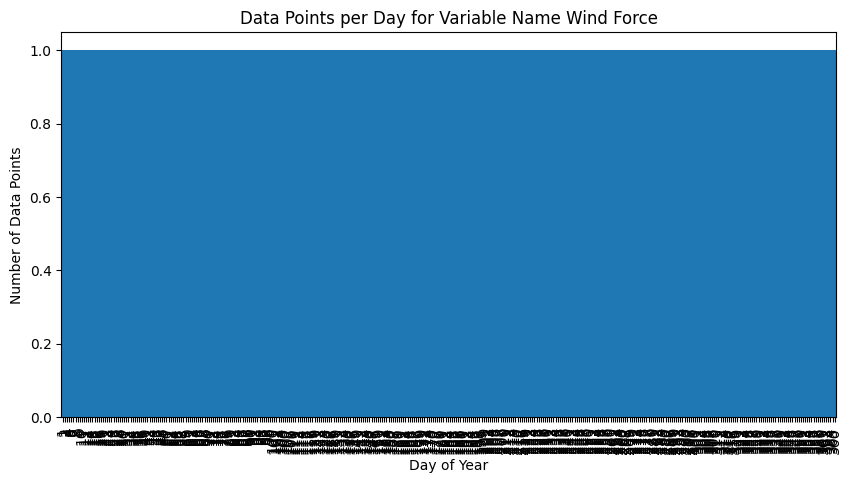

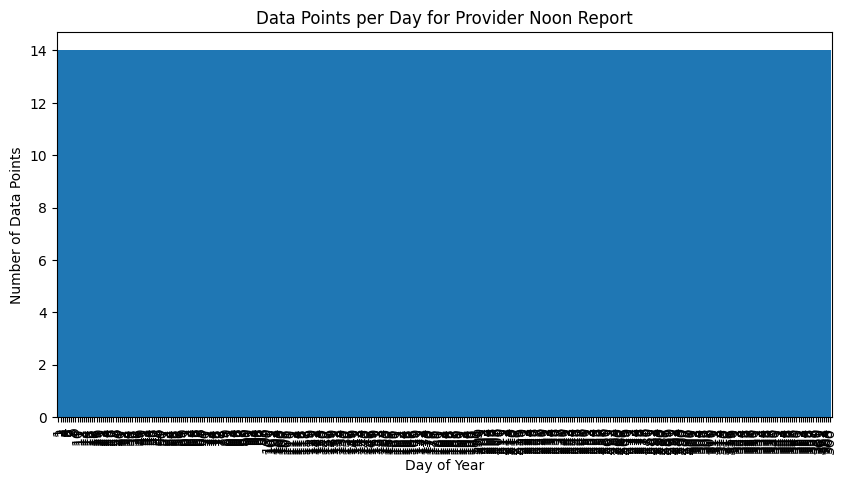

Variable Name: Wind Direction
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


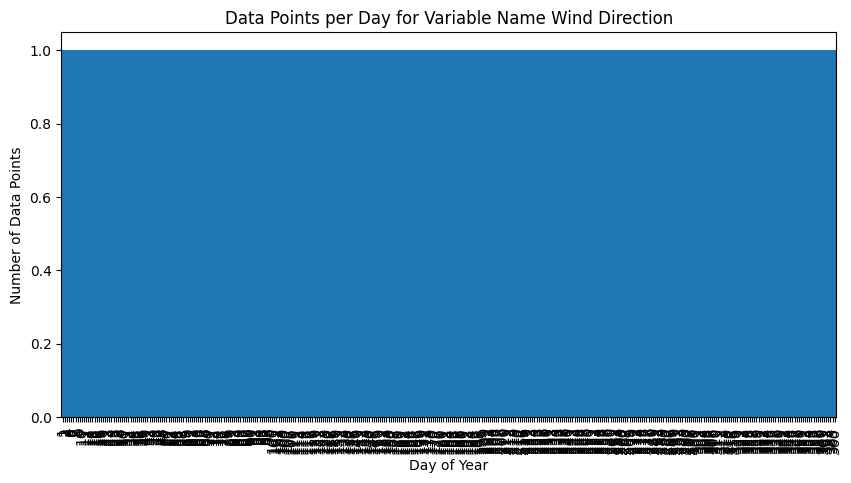

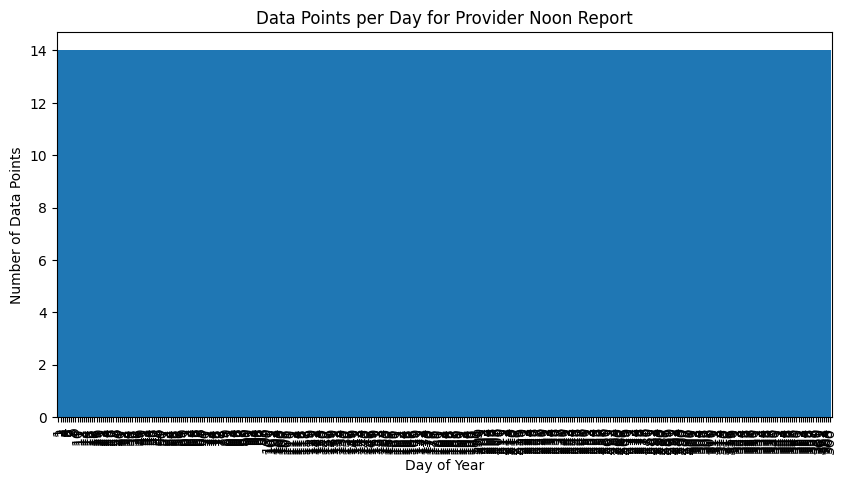

Variable Name: Sea Direction
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


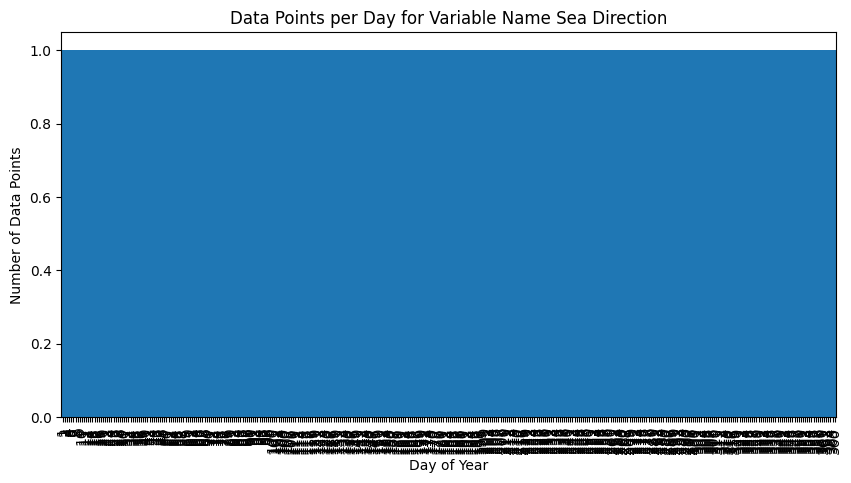

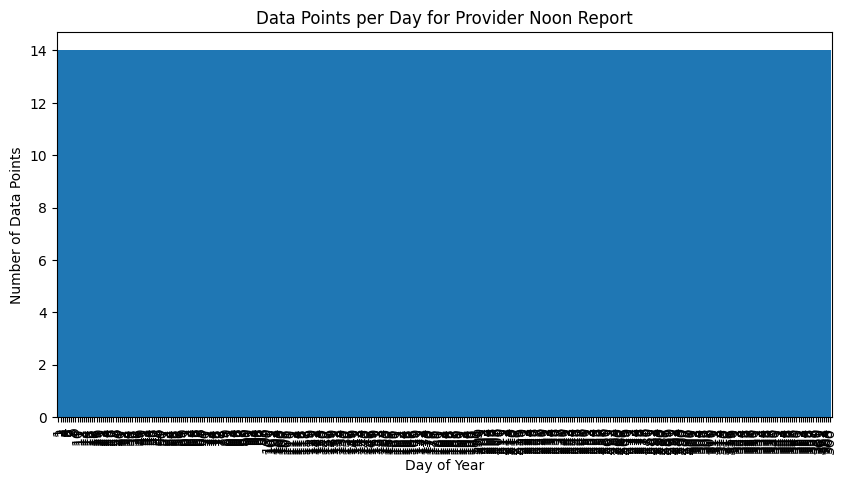

Variable Name: Sea State
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


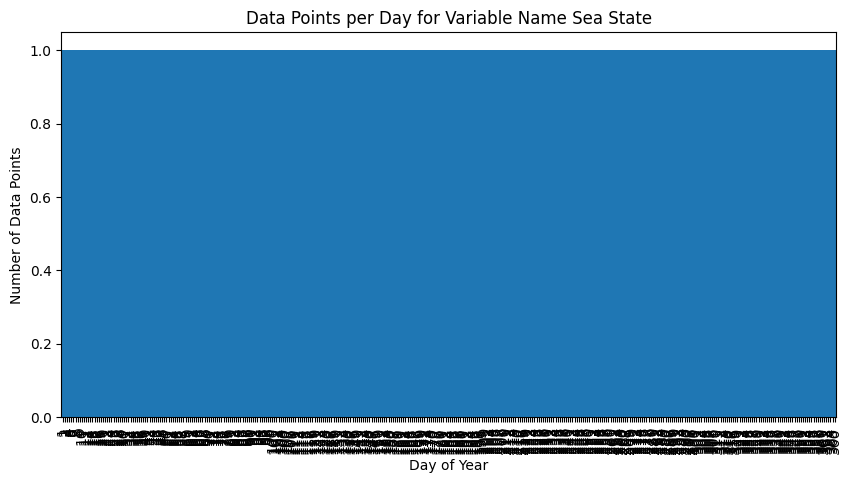

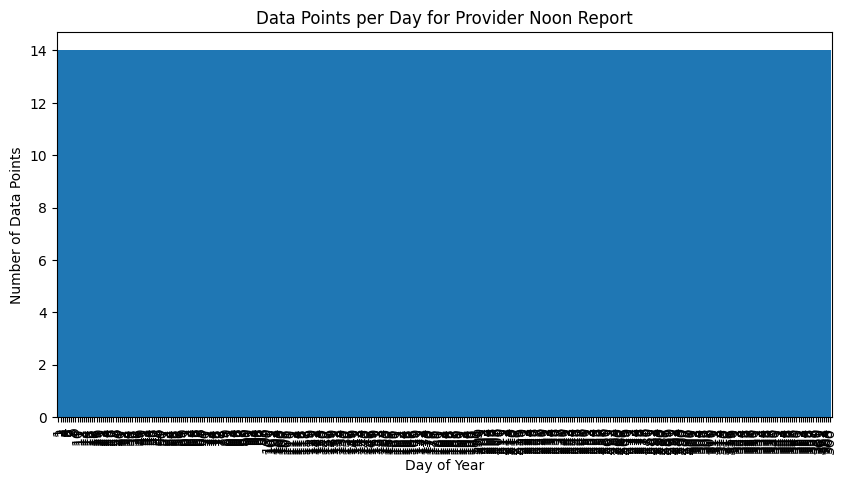

Variable Name: Consumption for Propulsion
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


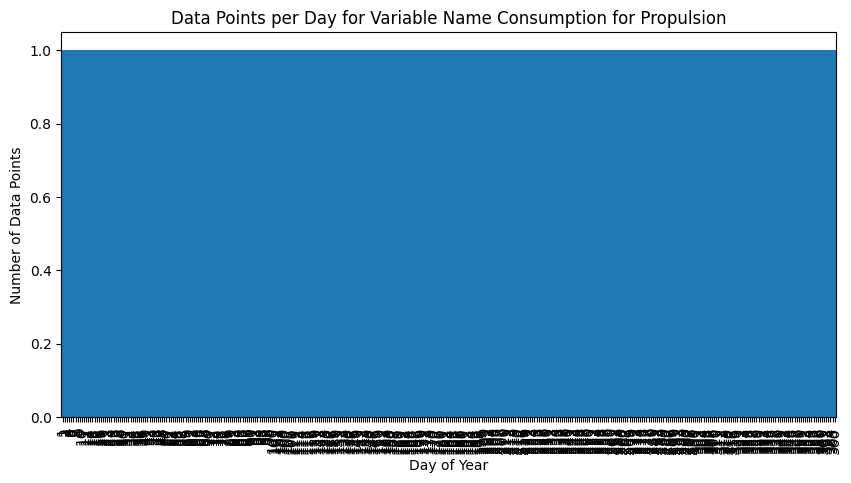

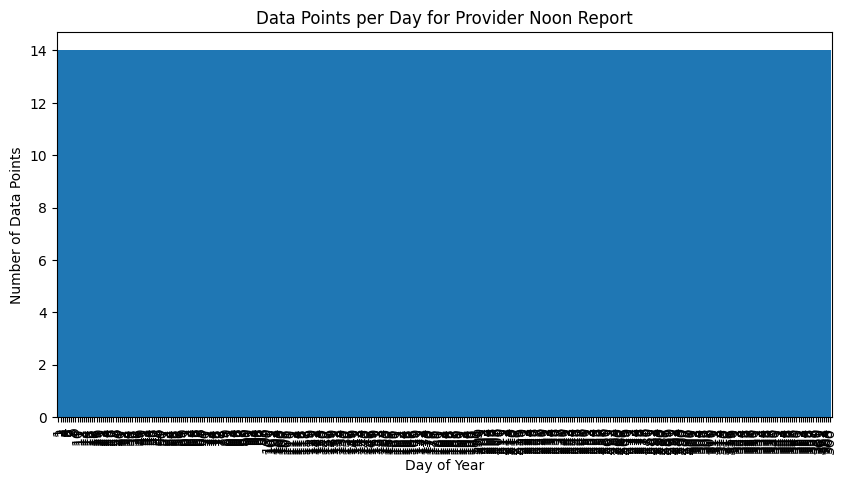

Variable Name: Bar Pressure
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


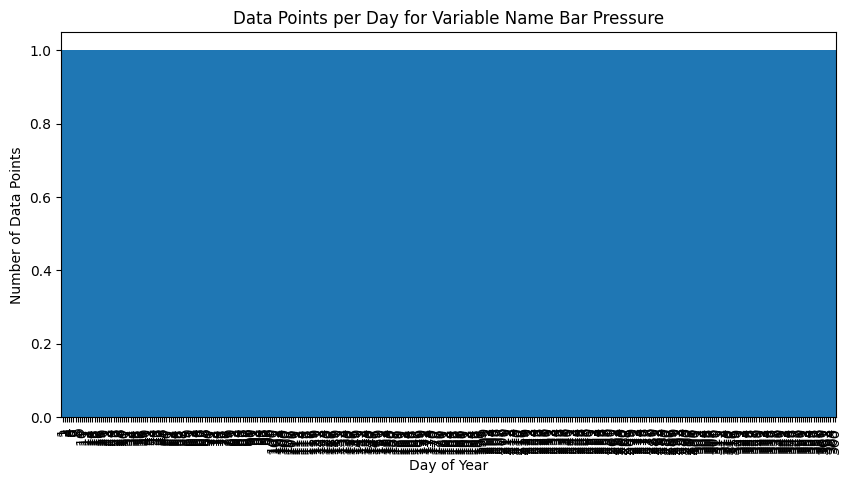

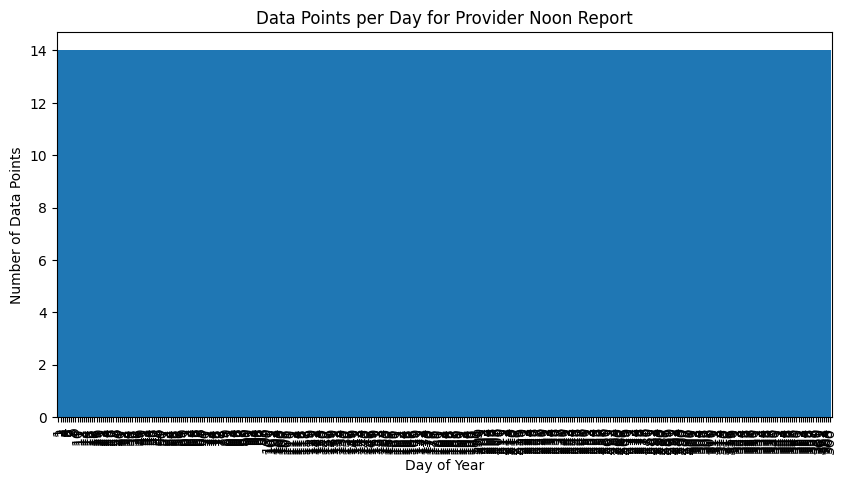

Variable Name: Air Temp
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


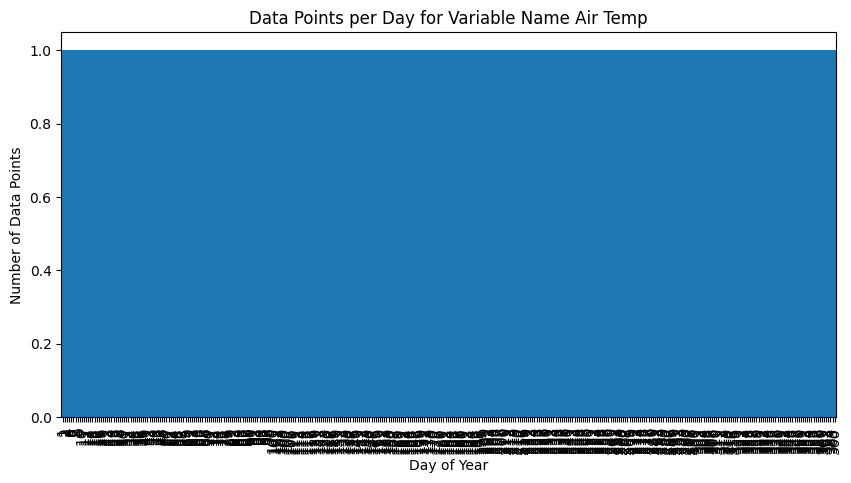

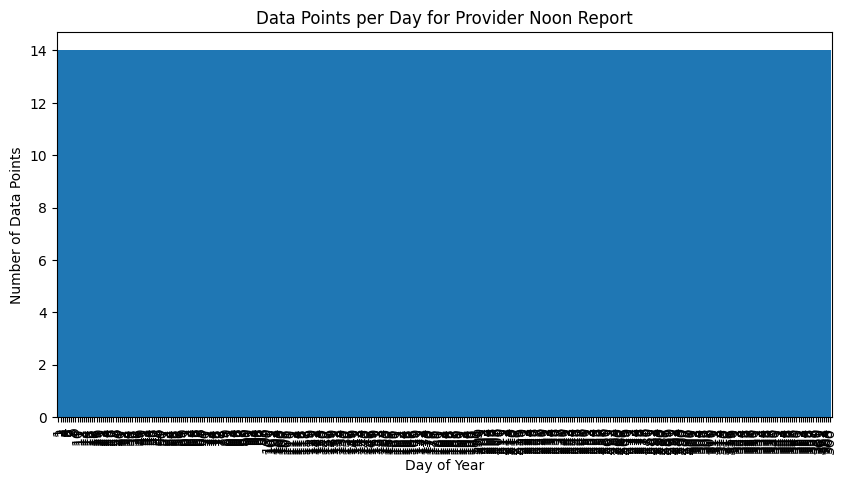

Variable Name: Displacement
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


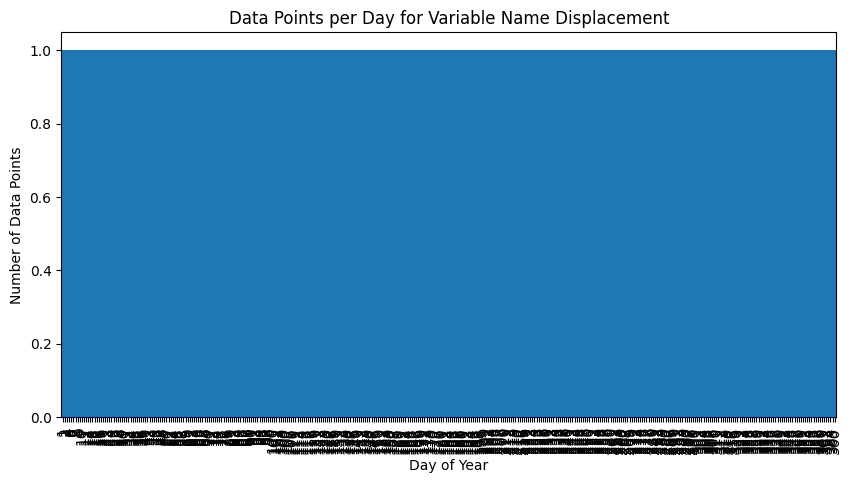

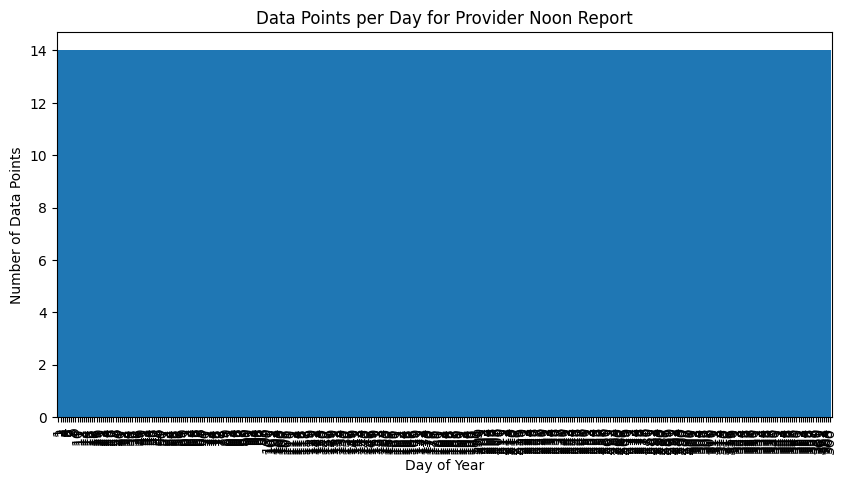

Variable Name: Aft Draft
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


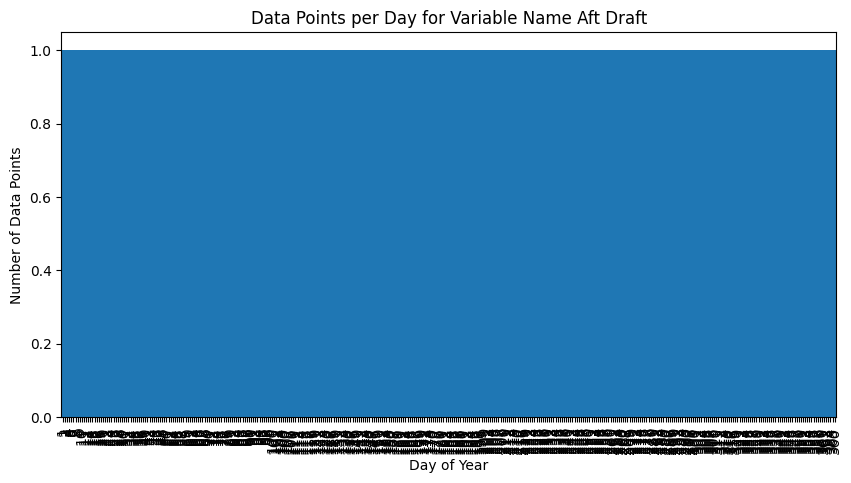

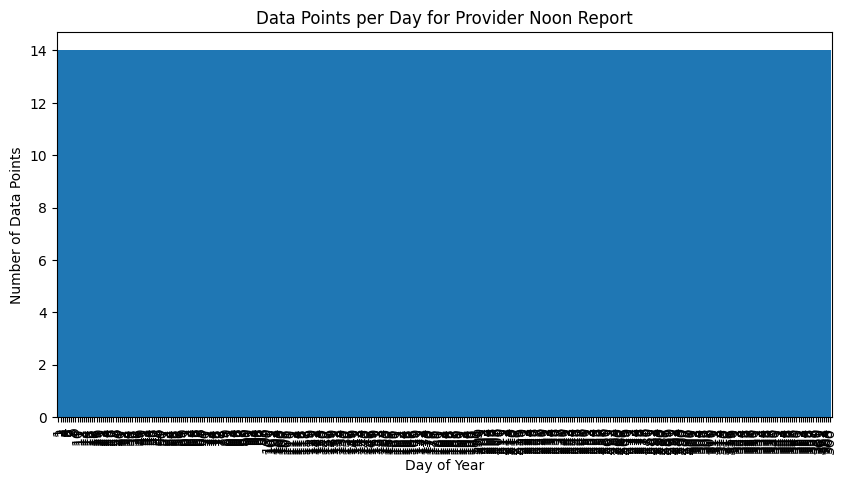

Variable Name: Mid Draft
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


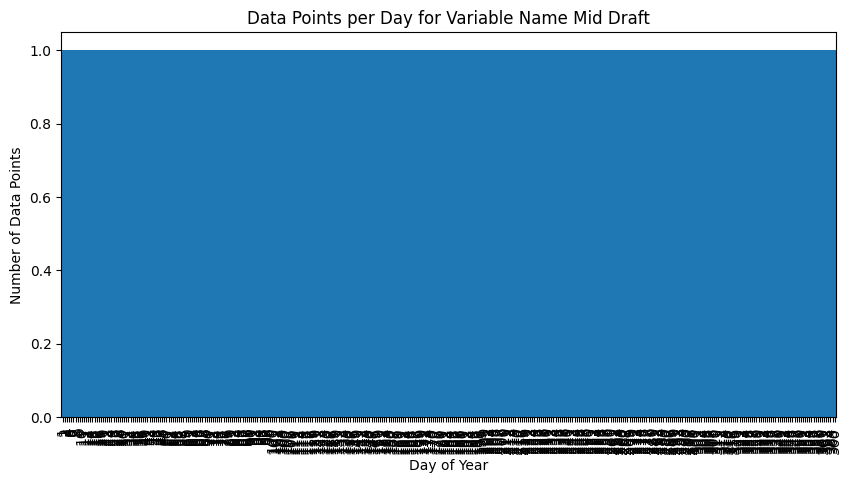

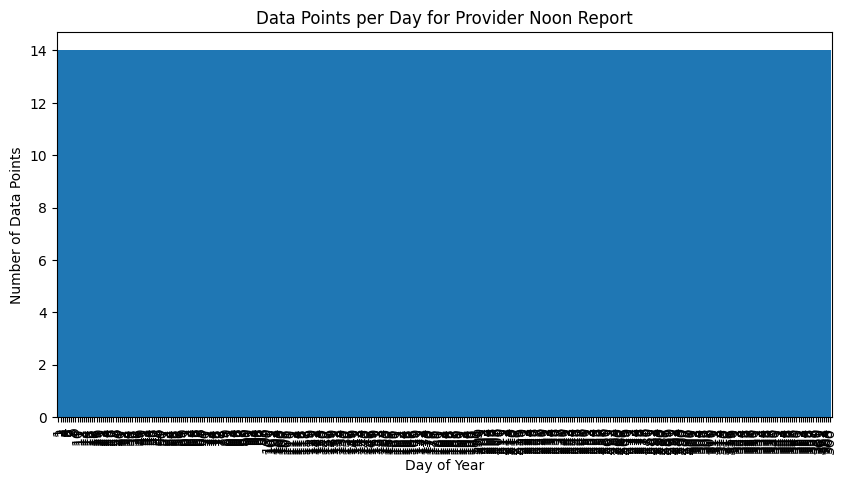

Variable Name: Fuel
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


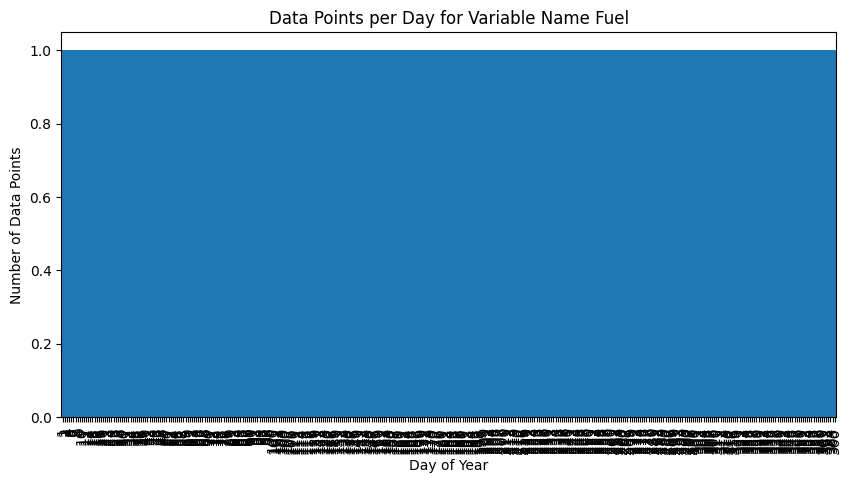

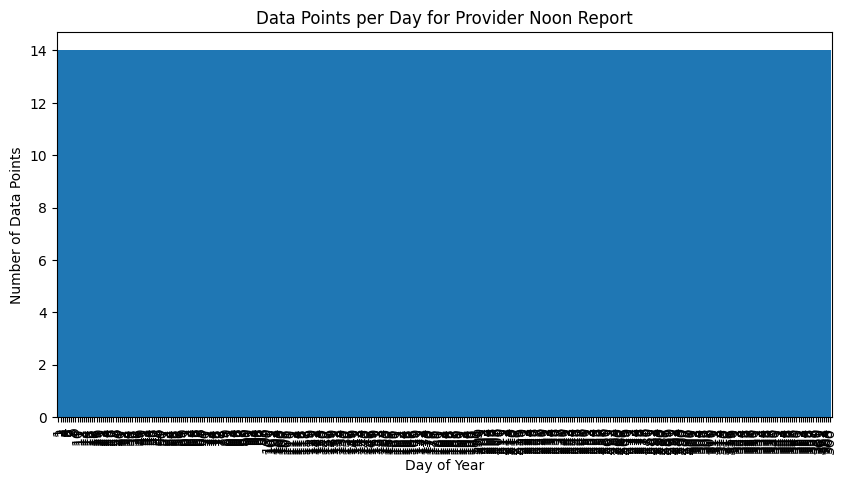

Variable Name: Fwd Draft
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


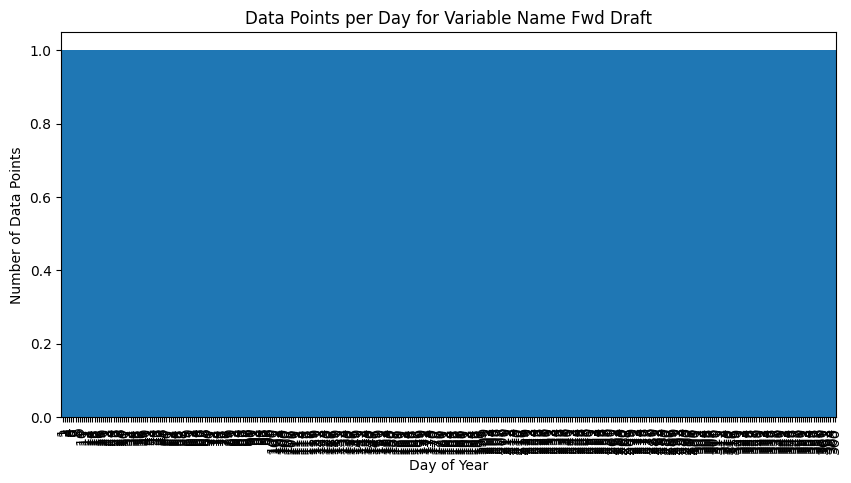

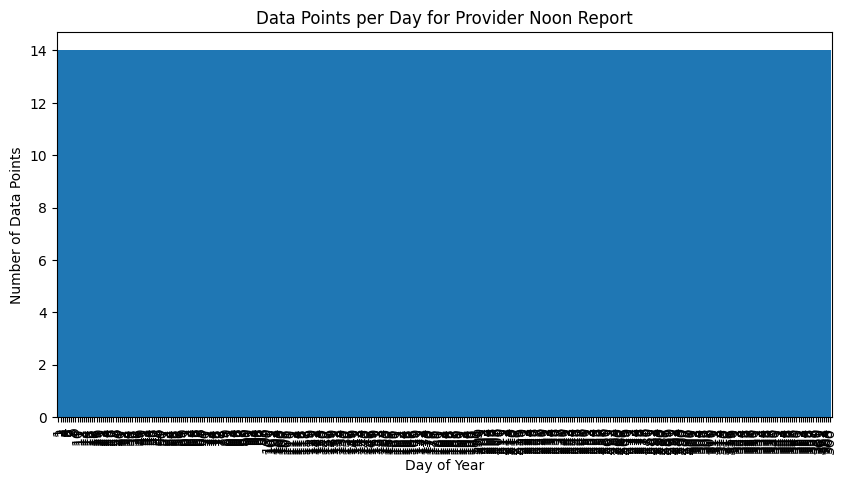

Variable Name: Slip
Expected days: 365
Actual days: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23), np.int32(24), np.int32(25), np.int32(26), np.int32(27), np.int32(28), np.int32(29), np.int32(30), np.int32(31)]


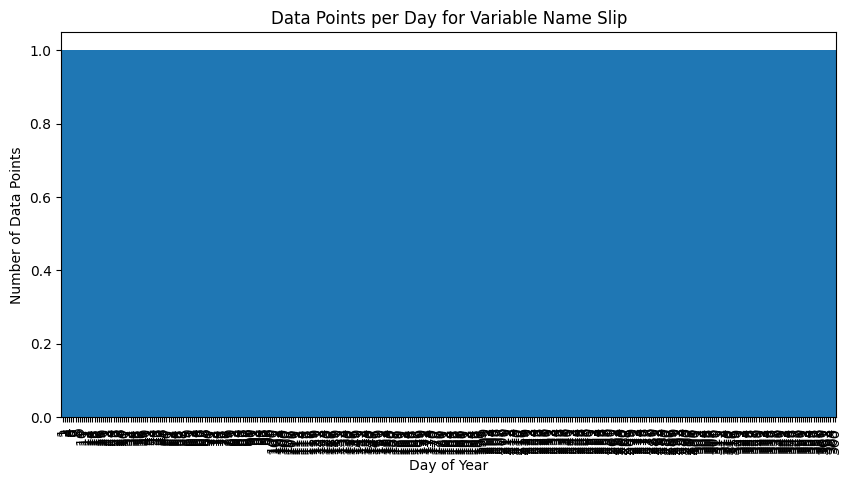

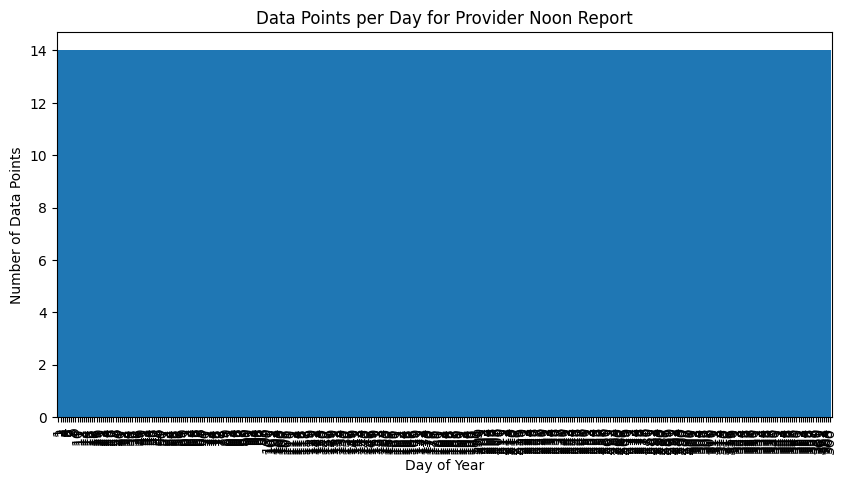

In [11]:
for var_name, var_qid, source_name in qid_mappings_dict.itertuples(index=False):
    check_daily_distribution(df, var_qid, var_name)
    check_daily_source_distribution(df, source_name)

## Checking number of data points for each day of each month

In [12]:
def check_monthly_distribution(df, month):
    month_data = df[df['utc_timestamp'].dt.month == month]
    counts = month_data['utc_timestamp'].dt.day.value_counts().sort_index()
    total_data_points = len(month_data)
    
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Distribution of Data Points in {datetime(2023, month, 1).strftime("%B")} (Total: {total_data_points})')
    plt.xlabel('Day of Month')
    plt.ylabel('Number of Data Points')
    plt.show()

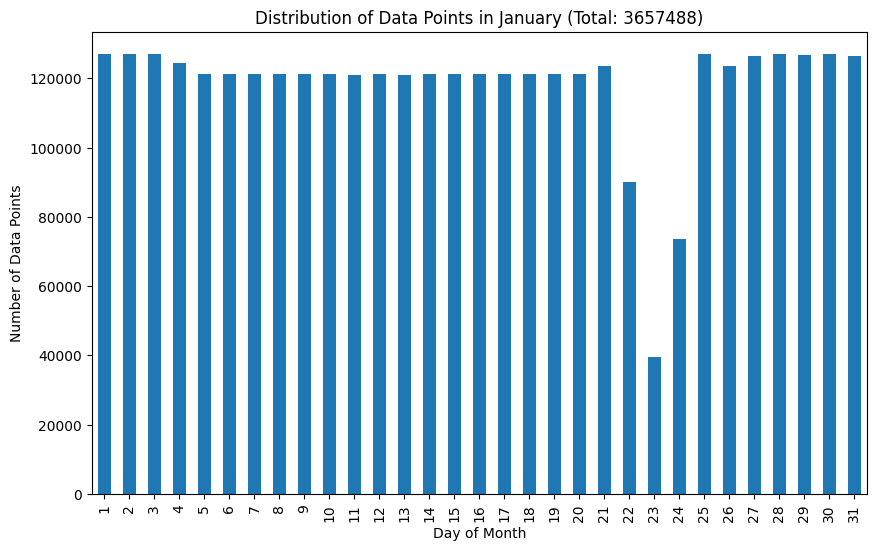

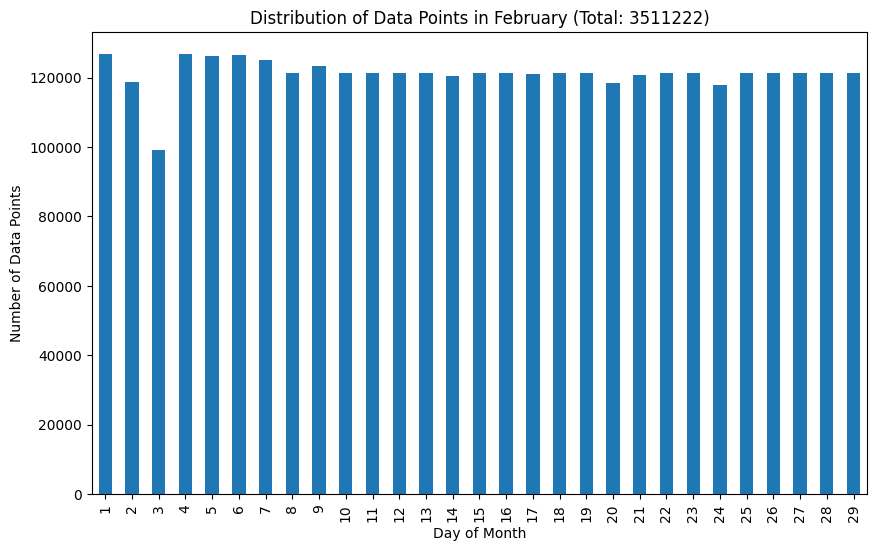

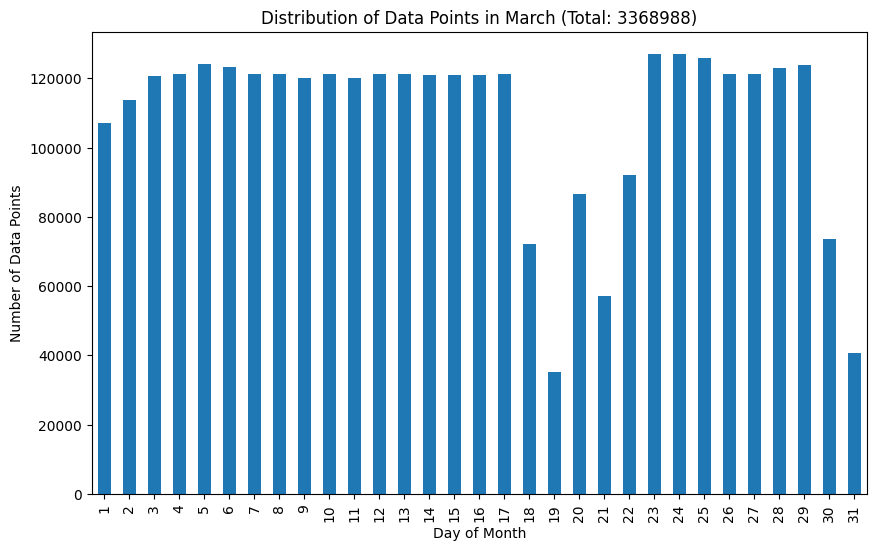

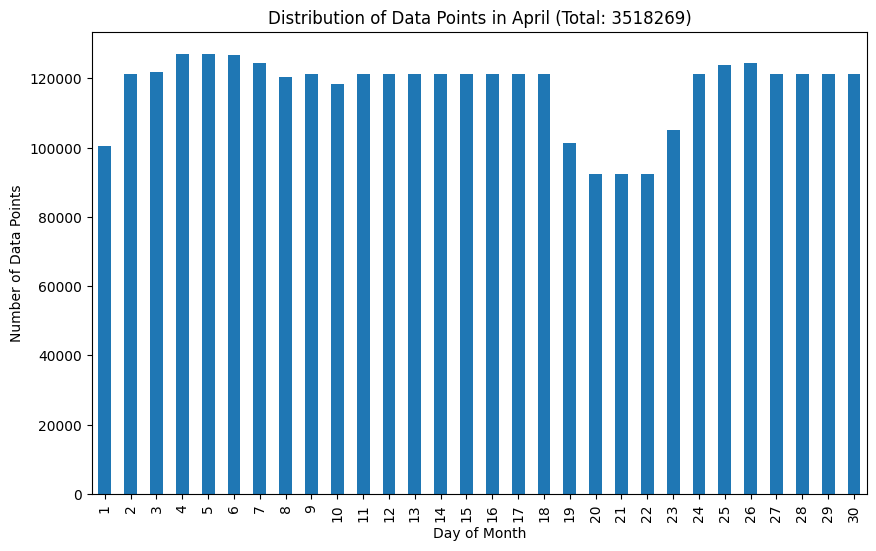

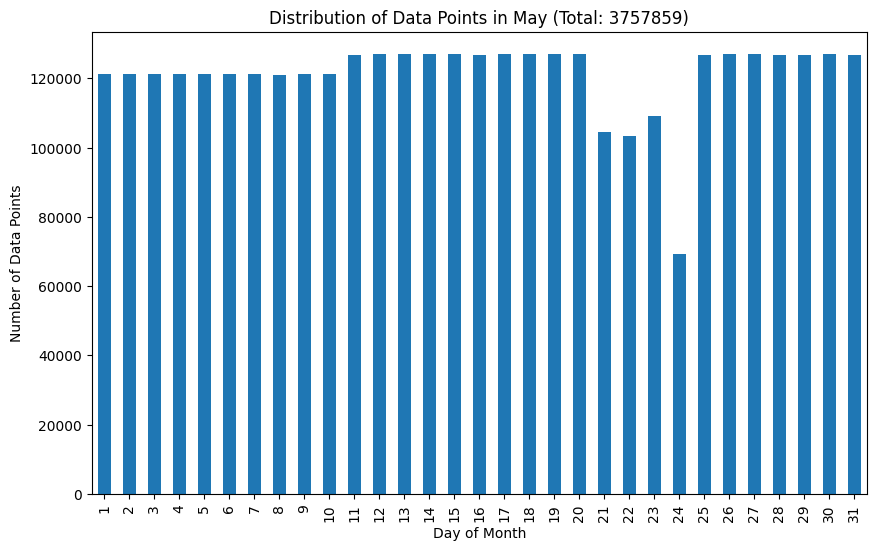

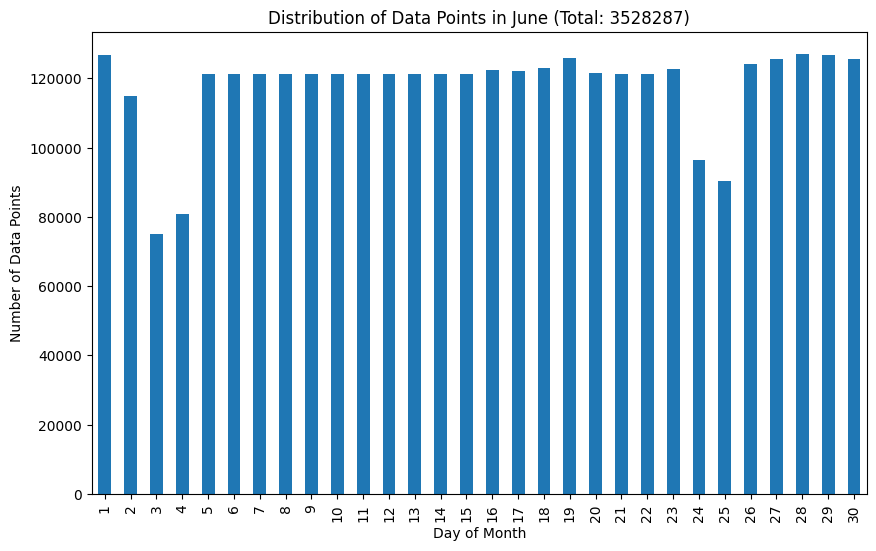

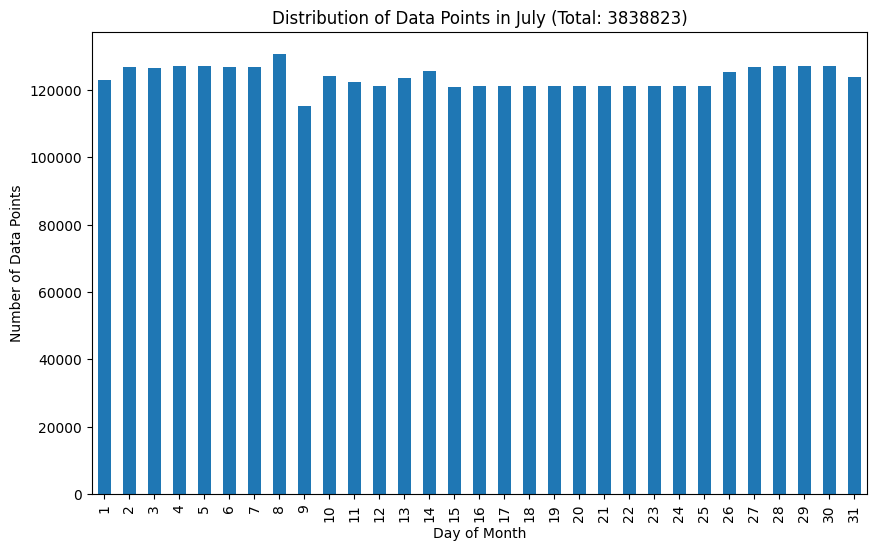

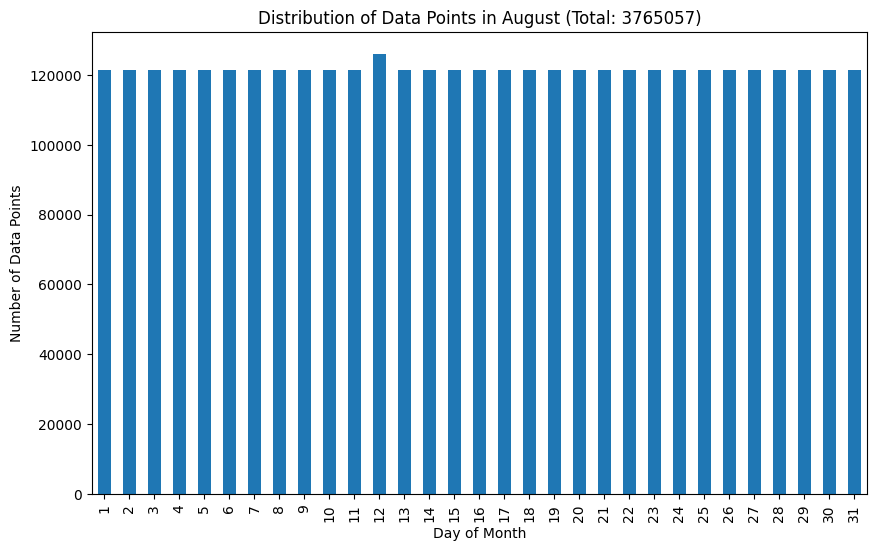

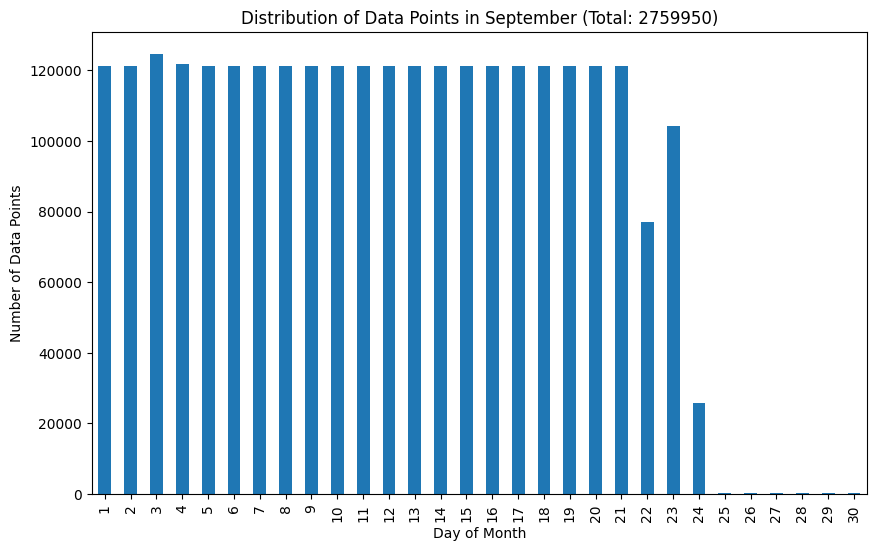

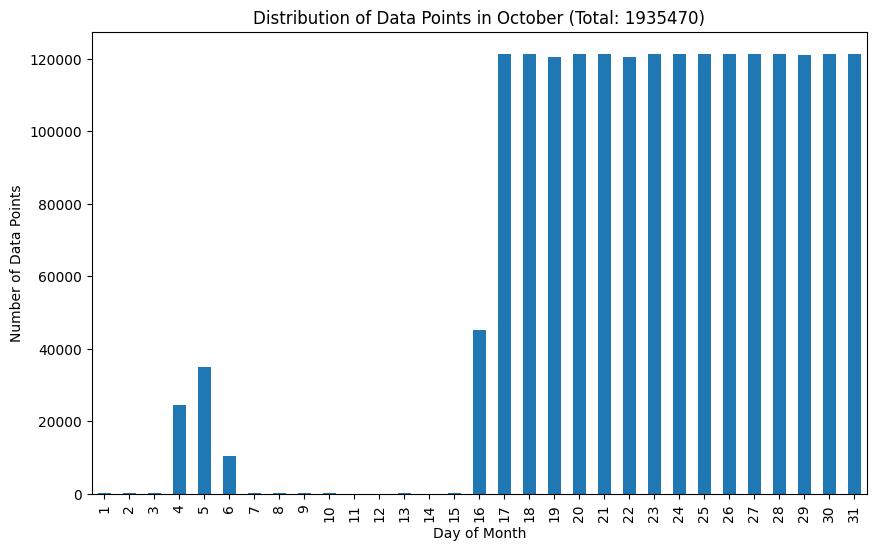

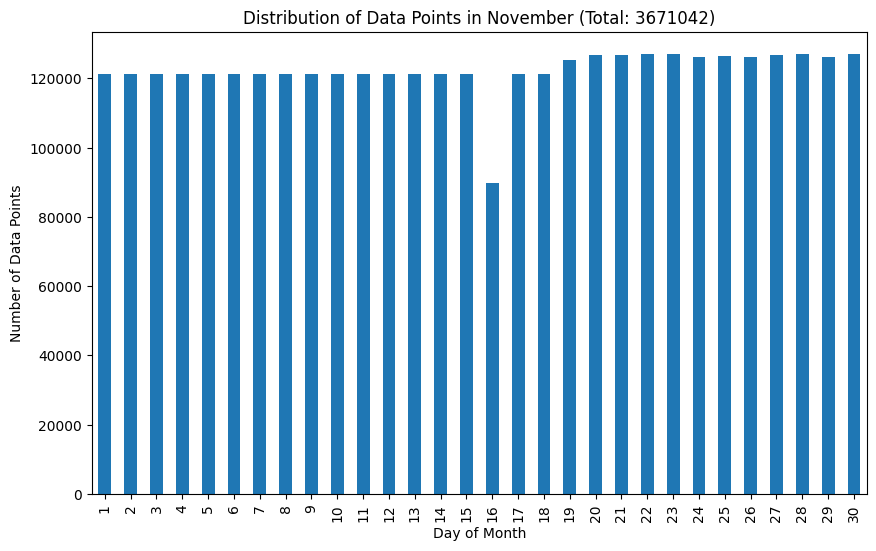

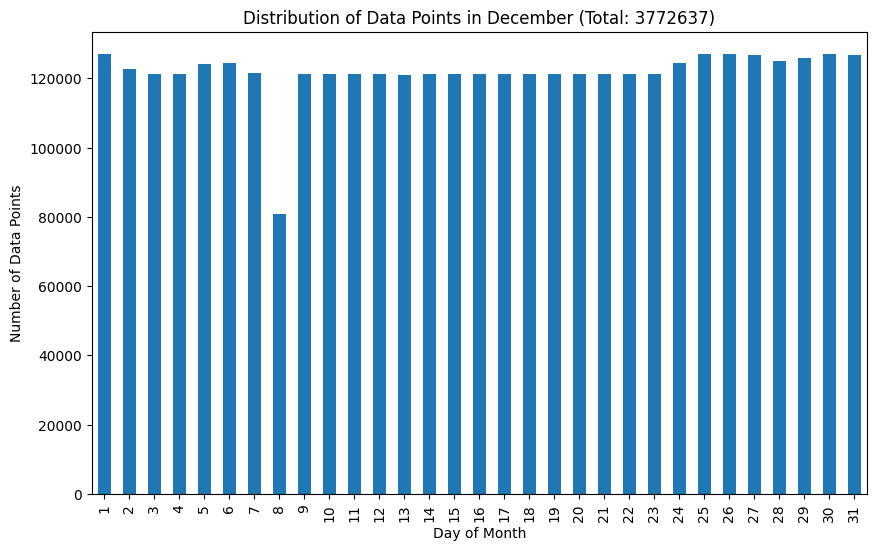

In [13]:
for i in range(1, 13):
    check_monthly_distribution(df, i)

## Checking an example of each variable for correct datetime conversion

### (looks good)

In [15]:
# set a random seed for reproducibility
np.random.seed(42)

In [18]:
def inspect_datetime_conversion(df, qid_mappings_dict):
    for var_name, var_qid, source_name in qid_mappings_dict.itertuples(index=False):
        var_data = df[df['qid_mapping'] == var_qid]
        sampled_data = var_data.sample(n=5)
        sampled_data['month'] = sampled_data['utc_timestamp'].dt.month
        print(f"Variable Name: {var_name}")
        print(sampled_data[['utc_timestamp', 'value', 'month']])
        print("\n")

In [19]:
inspect_datetime_conversion(df, qid_mappings_dict)

Variable Name: Vessel External Conditions Eastward Sea Water Velocity
                     utc_timestamp    value  month
19636623 2024-06-16 18:00:00+00:00  -0.2088      6
31715581 2024-10-04 13:00:00+00:00  -0.1283     10
32999916 2024-10-26 17:00:00+00:00  -0.1103     10
11537278 2024-04-09 06:00:00+00:00  -0.0395      4
3588871  2024-01-31 11:00:00+00:00   0.1137      1


Variable Name: Vessel External Conditions Northward Wind Velocity
                     utc_timestamp    value  month
38017305 2024-12-06 17:00:00+00:00  -1.2275     12
12883969 2024-04-20 17:00:00+00:00  -4.7975      4
16300518 2024-05-19 03:00:00+00:00   3.3088      5
4841724  2024-02-10 18:00:00+00:00   0.3981      2
37980220 2024-12-06 10:00:00+00:00   -4.204     12


Variable Name: Vessel External Conditions Northward Sea Water Velocity
                     utc_timestamp    value  month
31778595 2024-10-14 17:00:00+00:00  -0.0049     10
8363349  2024-03-11 00:00:00+00:00  -0.0662      3
29849385 2024-09-08 10:0

## Check distribution / histogram throughout the day for each variable

### (looks very uniform throughout the day)

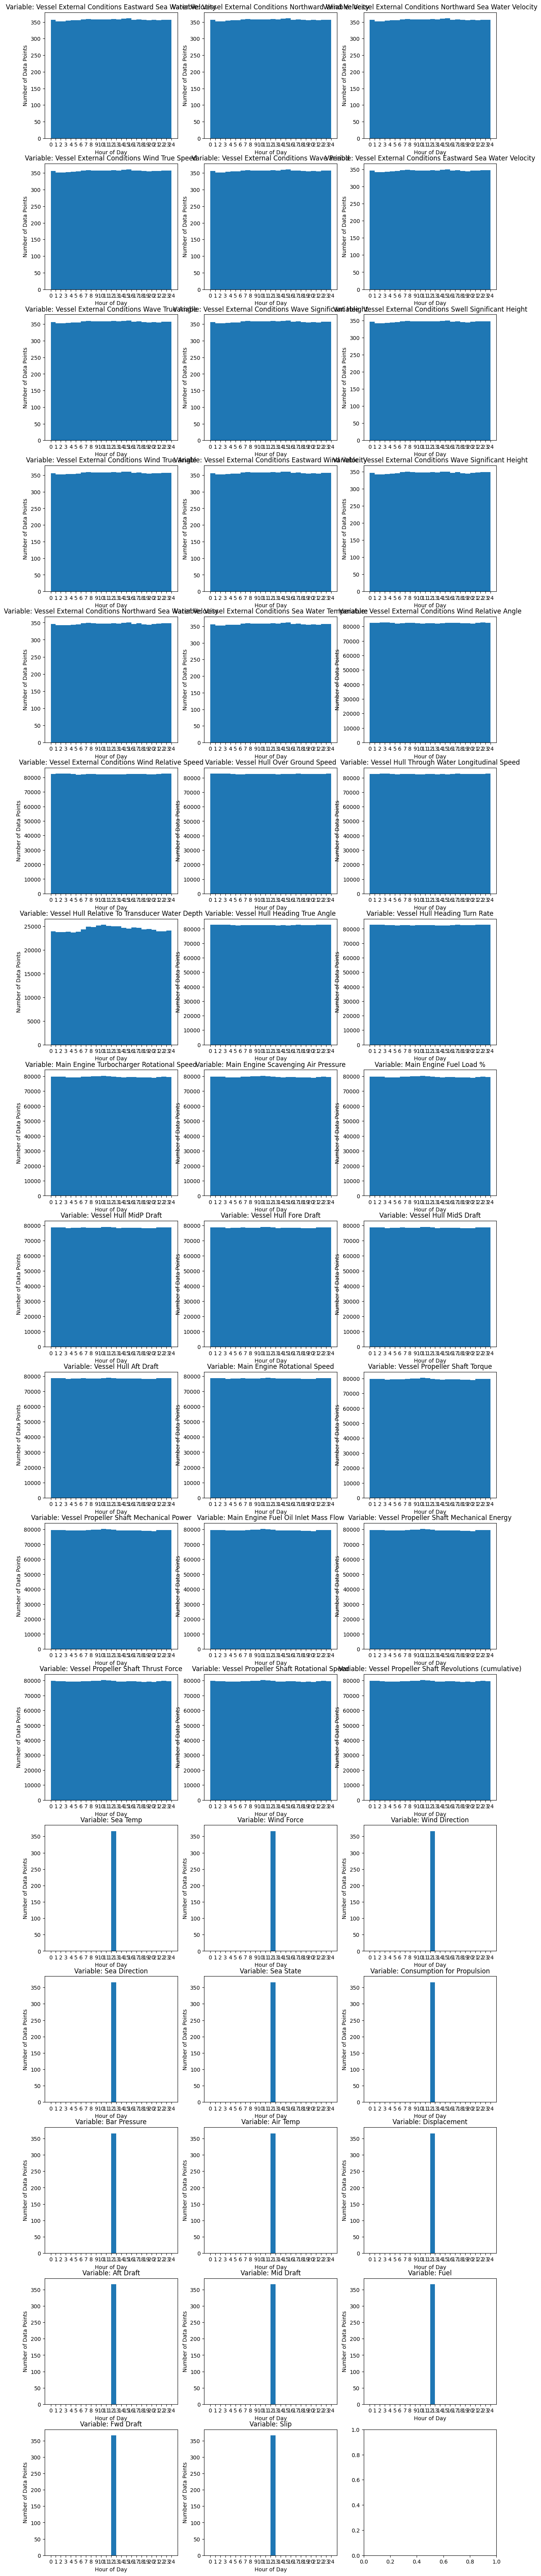

In [20]:
# print the histograms in rows of 3 

fig, axes = plt.subplots(nrows=(len(qid_mappings_dict) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(qid_mappings_dict) + 2) // 3)))
axes = axes.flatten()

for i, (var_name, var_qid, source_name) in enumerate(qid_mappings_dict.itertuples(index=False)):
    var_data = df[df['qid_mapping'] == var_qid]
    var_data['hour'] = var_data['utc_timestamp'].dt.hour
    
    axes[i].hist(var_data['hour'], bins=24, range=(0, 24))
    axes[i].set_title(f'Variable: {var_name}')
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_ylabel('Number of Data Points')
    axes[i].set_xticks(range(0, 25))

## Derive when cleaning events happened by looking at speed

In [20]:
def inspect_speed(df, month):
    # Filter for the specific month and sensor
    month_data = df[(df['utc_timestamp'].dt.month == month) & (df['qid_mapping'] == '2::0::6::1_1::1::0::2::0_1::0::1::0_8')].copy()
    
    # Convert value column to numeric
    month_data['value'] = pd.to_numeric(month_data['value'], errors='coerce')
    
    # Set timestamp as index and resample to hourly mean
    month_data = month_data.set_index('utc_timestamp')
    hourly_data = month_data['value'].resample('h').mean()
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(hourly_data.index, hourly_data.values)
    plt.title(f'Hull Over Ground Speed in {datetime(2023, month, 1).strftime("%B")}')
    plt.xlabel('Date')
    plt.ylabel('Speed (knots)')
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=10))
    plt.tight_layout()
    
    plt.show()


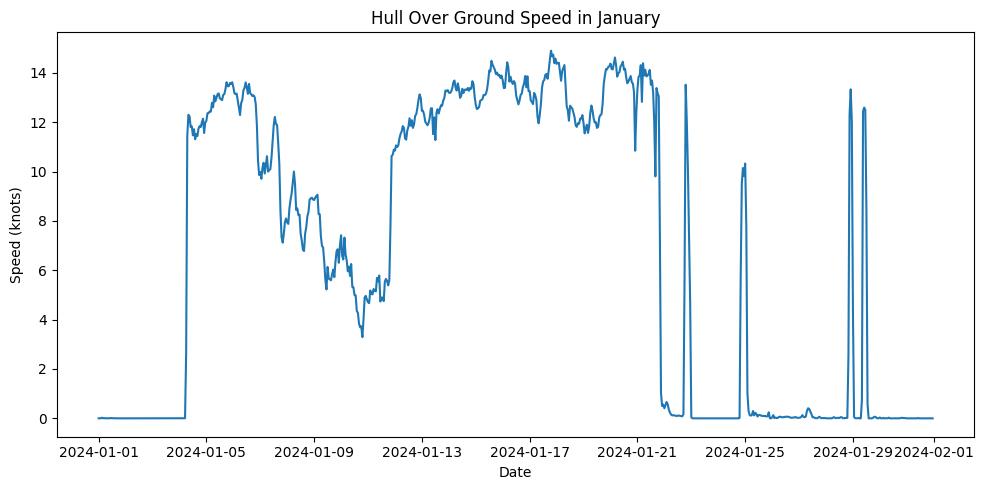

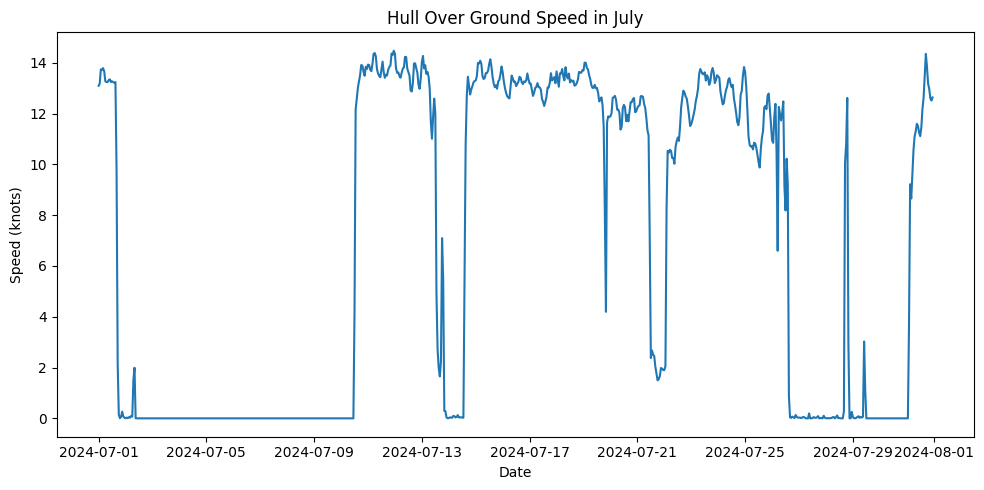

In [21]:
inspect_speed(df, 1)  # January
inspect_speed(df, 7)  # July

## [Placeholder]